In [1]:
pip install pyopls

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyopls in c:\users\jinca\anaconda3\lib\site-packages (20.3.post1)



In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from pyopls import OPLS
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score
from scipy.signal import savgol_filter


In [3]:
#Visual INspection of the raw data of the Averaged PURE API's

In [4]:
#Import the raw PURE API Averaged Data

In [5]:
data_dece = pd.read_csv(r'Pooled_Averaged_API_Runs_No_1_Col.csv')
x_dece= data_dece.values[:,3:]

wv = np.arange(900,1700,3.52)

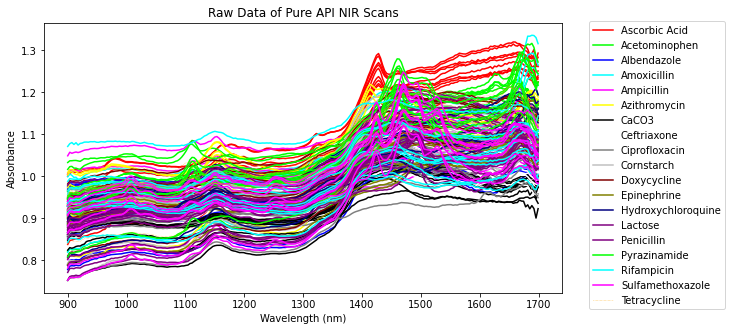

In [6]:

spectra_dece = pd.read_csv(r'Pooled_Averaged_API_Runs_No_1_Col.csv')
#target_dece = pd.read_csv(r'Cipro_conc_mg.csv')

spectra_dece = pd.DataFrame(spectra_dece)
spectra_dece = spectra_dece.values[0:,0:]
spectra_dece_T = spectra_dece.T

Ascorbic_Acid =spectra_dece_T[:,0:10]
Acetominophen =spectra_dece_T[:,10:20]
Albendazole =spectra_dece_T[:,20:30]
Amoxicillin =spectra_dece_T[:,30:40]
Ampicillin =spectra_dece_T[:,40:50]
Azithromycin =spectra_dece_T[:,50:60]
CaCO3 =spectra_dece_T[:,60:70]
Ceftriaxone =spectra_dece_T[:,70:80]
Ciprofloxacin =spectra_dece_T[:,80:90]
Cornstarch =spectra_dece_T[:,90:100]
Doxycycline =spectra_dece_T[:,100:110]
Epinephrine =spectra_dece_T[:,110:120]
Ethambutol =spectra_dece_T[:,120:130]
Hydroxychloroquine =spectra_dece_T[:,130:137]
Lactose =spectra_dece_T[:,137:147]
Penicillin =spectra_dece_T[:,147:157]
Pyrazinamide =spectra_dece_T[:,157:167]
Rifampicin =spectra_dece_T[:,167:177]
Sulfamethoxazole =spectra_dece_T[:,177:187]
Tetracycline =spectra_dece_T[:,187:197]

fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ascorbic_Acid, label='Ascorbic Acid',color='#FF0000');
ax.plot(wv, Acetominophen, label='Acetominophen',color='#00FF00');
ax.plot(wv, Albendazole, label='Albendazole',color='#0000FF');
ax.plot(wv, Amoxicillin, label='Amoxicillin',color='#00FFFF');
ax.plot(wv, Ampicillin, label='Ampicillin',color='#FF00FF');
ax.plot(wv, Azithromycin, label='Azithromycin',color='#FFFF00');
ax.plot(wv, CaCO3, label='CaCO3',color='#000000');
ax.plot(wv, Ceftriaxone, label='Ceftriaxone',color='#FFFFFF');
ax.plot(wv, Ciprofloxacin, label='Ciprofloxacin',color='#808080');
ax.plot(wv, Cornstarch, label='Cornstarch',color='#C0C0C0');
ax.plot(wv, Doxycycline, label='Doxycycline',color='#800000');
ax.plot(wv, Epinephrine, label='Epinephrine',color='#808000');
ax.plot(wv, Hydroxychloroquine, label='Hydroxychloroquine',color='#000080');
ax.plot(wv, Lactose, label='Lactose',color='#800080');
ax.plot(wv, Penicillin, label='Penicillin',color='#800080');
ax.plot(wv, Pyrazinamide, label='Pyrazinamide',color='#00FF00');
ax.plot(wv, Rifampicin, label='Rifampicin',color='#00FFFF');
ax.plot(wv, Sulfamethoxazole, label='Sulfamethoxazole',color='#FF00FF');
ax.plot(wv, Tetracycline, label='Tetracycline',color='#FFA500',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Raw Data of Pure API NIR Scans")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

In [7]:
def snv(x):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(x)
    for i in range(x.shape[0]):
 
        # Apply correction
        output_data[i,:] = (x[i,:] - np.mean(x[i,:])) / np.std(x[i,:])
 
    return output_data

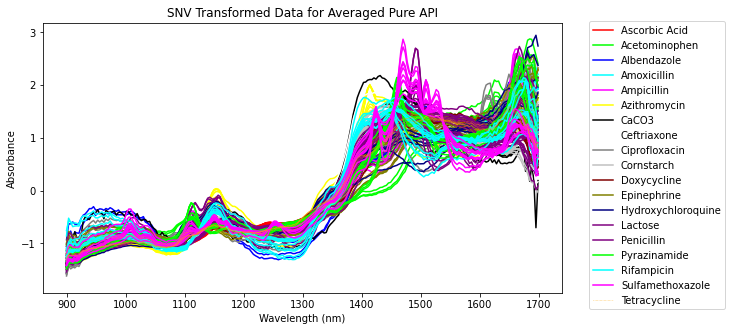

In [8]:

data_dece_snv = pd.read_csv(r'Pooled_Averaged_API_Runs_No_1_Col.csv')
x_dece_snv= data_dece_snv.values[:,:]
spectra_dece_snv = snv(x_dece_snv)

spectra_dece_snv = pd.DataFrame(spectra_dece_snv)
spectra_dece_snv = spectra_dece_snv.values[0:,0:]
spectra_dece_snv_T = spectra_dece_snv.T


Ascorbic_Acid_SNV =spectra_dece_snv_T[:,0:10]
Acetominophen_SNV =spectra_dece_snv_T[:,10:20]
Albendazole_SNV =spectra_dece_snv_T[:,20:30]
Amoxicillin_SNV =spectra_dece_snv_T[:,30:40]
Ampicillin_SNV =spectra_dece_snv_T[:,40:50]
Azithromycin_SNV =spectra_dece_snv_T[:,50:60]
CaCO3_SNV =spectra_dece_snv_T[:,60:70]
Ceftriaxone_SNV =spectra_dece_snv_T[:,70:80]
Ciprofloxacin_SNV =spectra_dece_snv_T[:,80:90]
Cornstarch_SNV =spectra_dece_snv_T[:,90:100]
Doxycycline_SNV =spectra_dece_snv_T[:,100:110]
Epinephrine_SNV =spectra_dece_snv_T[:,110:120]
Ethambutol_SNV =spectra_dece_snv_T[:,120:130]
Hydroxychloroquine_SNV =spectra_dece_snv_T[:,130:137]
Lactose_SNV =spectra_dece_snv_T[:,137:147]
Penicillin_SNV =spectra_dece_snv_T[:,147:157]
Pyrazinamide_SNV =spectra_dece_snv_T[:,157:167]
Rifampicin_SNV =spectra_dece_snv_T[:,167:177]
Sulfamethoxazole_SNV =spectra_dece_snv_T[:,177:187]
Tetracycline_SNV =spectra_dece_snv_T[:,187:197]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, Ascorbic_Acid_SNV, label='Ascorbic Acid',color='#FF0000');
ax.plot(wv, Acetominophen_SNV, label='Acetominophen',color='#00FF00');
ax.plot(wv, Albendazole_SNV, label='Albendazole',color='#0000FF');
ax.plot(wv, Amoxicillin_SNV, label='Amoxicillin',color='#00FFFF');
ax.plot(wv, Ampicillin_SNV, label='Ampicillin',color='#FF00FF');
ax.plot(wv, Azithromycin_SNV, label='Azithromycin',color='#FFFF00');
ax.plot(wv, CaCO3_SNV, label='CaCO3',color='#000000');
ax.plot(wv, Ceftriaxone_SNV, label='Ceftriaxone',color='#FFFFFF');
ax.plot(wv, Ciprofloxacin_SNV, label='Ciprofloxacin',color='#808080');
ax.plot(wv, Cornstarch_SNV, label='Cornstarch',color='#C0C0C0');
ax.plot(wv, Doxycycline_SNV, label='Doxycycline',color='#800000');
ax.plot(wv, Epinephrine_SNV, label='Epinephrine',color='#808000');
ax.plot(wv, Hydroxychloroquine_SNV, label='Hydroxychloroquine',color='#000080');
ax.plot(wv, Lactose_SNV, label='Lactose',color='#800080');
ax.plot(wv, Penicillin_SNV, label='Penicillin',color='#800080');
ax.plot(wv, Pyrazinamide_SNV, label='Pyrazinamide',color='#00FF00');
ax.plot(wv, Rifampicin_SNV, label='Rifampicin',color='#00FFFF');
ax.plot(wv, Sulfamethoxazole_SNV, label='Sulfamethoxazole',color='#FF00FF');
ax.plot(wv, Tetracycline_SNV, label='Tetracycline',color='#FFA500',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Averaged Pure API")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

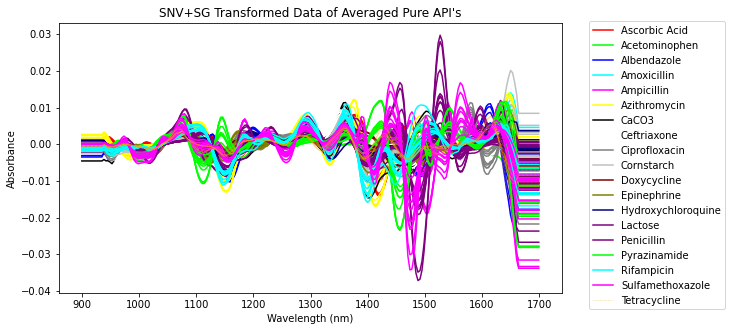

In [9]:
#Visual inspection of line plot of the SNV+SG Pure API

Xsnv_sg_dece = savgol_filter(spectra_dece_snv, 21, polyorder = 2, deriv=2)

spectra_snvsg_dece = pd.DataFrame(Xsnv_sg_dece)
spectra_snvsg_dece = spectra_snvsg_dece.values[0:,0:]
spectra_T_dece = spectra_snvsg_dece.T

Ascorbic_Acid_SNVSG =spectra_T_dece[:,0:10]
Acetominophen_SNVSG =spectra_T_dece[:,10:20]
Albendazole_SNVSG =spectra_T_dece[:,20:30]
Amoxicillin_SNVSG =spectra_T_dece[:,30:40]
Ampicillin_SNVSG =spectra_T_dece[:,40:50]
Azithromycin_SNVSG =spectra_T_dece[:,50:60]
CaCO3_SNVSG =spectra_T_dece[:,60:70]
Ceftriaxone_SNVSG =spectra_T_dece[:,70:80]
Ciprofloxacin_SNVSG =spectra_T_dece[:,80:90]
Cornstarch_SNVSG =spectra_T_dece[:,90:100]
Doxycycline_SNVSG =spectra_T_dece[:,100:110]
Epinephrine_SNVSG =spectra_T_dece[:,110:120]
Ethambutol_SNVSG =spectra_T_dece[:,120:130]
Hydroxychloroquine_SNVSG =spectra_T_dece[:,130:137]
Lactose_SNVSG =spectra_T_dece[:,137:147]
Penicillin_SNVSG =spectra_T_dece[:,147:157]
Pyrazinamide_SNVSG =spectra_T_dece[:,157:167]
Rifampicin_SNVSG =spectra_T_dece[:,167:177]
Sulfamethoxazole_SNVSG =spectra_T_dece[:,177:187]
Tetracycline_SNVSG =spectra_T_dece[:,187:197]

fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ascorbic_Acid_SNVSG, label='Ascorbic Acid',color='#FF0000');
ax.plot(wv, Acetominophen_SNVSG, label='Acetominophen',color='#00FF00');
ax.plot(wv, Albendazole_SNVSG, label='Albendazole',color='#0000FF');
ax.plot(wv, Amoxicillin_SNVSG, label='Amoxicillin',color='#00FFFF');
ax.plot(wv, Ampicillin_SNVSG, label='Ampicillin',color='#FF00FF');
ax.plot(wv, Azithromycin_SNVSG, label='Azithromycin',color='#FFFF00');
ax.plot(wv, CaCO3_SNVSG, label='CaCO3',color='#000000');
ax.plot(wv, Ceftriaxone_SNVSG, label='Ceftriaxone',color='#FFFFFF');
ax.plot(wv, Ciprofloxacin_SNVSG, label='Ciprofloxacin',color='#808080');
ax.plot(wv, Cornstarch_SNVSG, label='Cornstarch',color='#C0C0C0');
ax.plot(wv, Doxycycline_SNVSG, label='Doxycycline',color='#800000');
ax.plot(wv, Epinephrine_SNVSG, label='Epinephrine',color='#808000');
ax.plot(wv, Hydroxychloroquine_SNVSG, label='Hydroxychloroquine',color='#000080');
ax.plot(wv, Lactose_SNVSG, label='Lactose',color='#800080');
ax.plot(wv, Penicillin_SNVSG, label='Penicillin',color='#800080');
ax.plot(wv, Pyrazinamide_SNVSG, label='Pyrazinamide',color='#00FF00');
ax.plot(wv, Rifampicin_SNVSG, label='Rifampicin',color='#00FFFF');
ax.plot(wv, Sulfamethoxazole_SNVSG, label='Sulfamethoxazole',color='#FF00FF');
ax.plot(wv, Tetracycline_SNVSG, label='Tetracycline',color='#FFA500',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Averaged Pure API's")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

In [10]:
#MSC

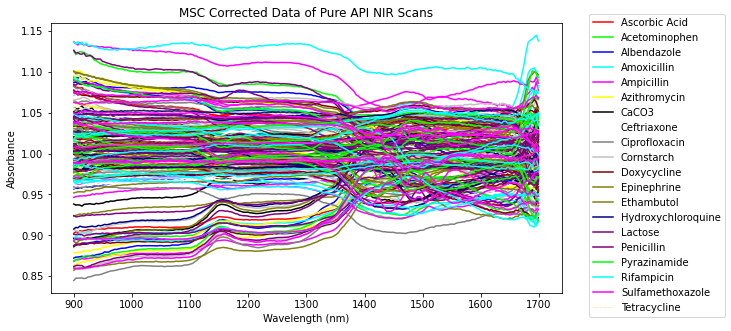

In [11]:
# Read the spectral data from the CSV file
spectra_dece_msc = pd.read_csv('Pooled_Averaged_API_Runs_No_1_Col.csv')
spectra_dece_msc = pd.DataFrame(spectra_dece_msc)
spectra_dece_msc = spectra_dece_msc.values[0:, 0:]  # Exclude the first column if it contains labels
spectra_dece__msc_T = spectra_dece_msc.T

# Define the wavelength array 'wv'
#wv = np.arange(1, spectra_dece_msc.shape[0] + 1)
wv1 = np.arange(900,1700,3.52)

# Define the spectra for each class
Ascorbic_Acid = spectra_dece__msc_T[:, 0:10]
Acetominophen = spectra_dece__msc_T[:, 10:20]
Albendazole = spectra_dece__msc_T[:, 20:30]
Amoxicillin = spectra_dece__msc_T[:, 30:40]
Ampicillin = spectra_dece__msc_T[:, 40:50]
Azithromycin = spectra_dece__msc_T[:, 50:60]
CaCO3 = spectra_dece__msc_T[:, 60:70]
Ceftriaxone = spectra_dece__msc_T[:,70:80]
Ciprofloxacin = spectra_dece__msc_T[:, 80:90]
Cornstarch = spectra_dece__msc_T[:, 90:100]
Doxycycline = spectra_dece__msc_T[:, 100:110]
Epinephrine = spectra_dece__msc_T[:, 110:120]
Ethambutol = spectra_dece__msc_T[:,120:130]
Hydroxychloroquine = spectra_dece__msc_T[:, 130:137]
Lactose = spectra_dece__msc_T[:, 137:147]
Penicillin = spectra_dece__msc_T[:, 147:157]
Pyrazinamide = spectra_dece__msc_T[:, 157:167]
Rifampicin = spectra_dece__msc_T[:, 167:177]
Sulfamethoxazole = spectra_dece__msc_T[:, 177:187]
Tetracycline = spectra_dece__msc_T[:, 187:197]

# Apply MSC correction to each class
def msc(data):
    mean_spectrum = np.mean(data, axis=1, keepdims=True)
    msc_data = data / mean_spectrum
    return msc_data

Ascorbic_Acid_MSC = msc(Ascorbic_Acid)
Acetominophen_MSC = msc(Acetominophen)
Albendazole_MSC = msc(Albendazole)
Amoxicillin_MSC = msc(Amoxicillin)
Ampicillin_MSC = msc(Ampicillin)
Azithromycin_MSC = msc(Azithromycin)
CaCO3_MSC = msc(CaCO3)
Ceftriaxone_MSC = msc(Ceftriaxone)
Ciprofloxacin_MSC = msc(Ciprofloxacin)
Cornstarch_MSC = msc(Cornstarch)
Doxycycline_MSC = msc(Doxycycline)
Epinephrine_MSC = msc(Epinephrine)
Ethambutol_MSC = msc(Ethambutol)
Hydroxychloroquine_MSC = msc(Hydroxychloroquine)
Lactose_MSC = msc(Lactose)
Penicillin_MSC = msc(Penicillin)
Pyrazinamide_MSC = msc(Pyrazinamide)
Rifampicin_MSC = msc(Rifampicin)
Sulfamethoxazole_MSC = msc(Sulfamethoxazole)
Tetracycline_MSC = msc(Tetracycline)

# Plot the corrected spectra
fig, ax = plt.subplots(figsize=(8, 4.7))

ax.plot(wv1, Ascorbic_Acid_MSC, label='Ascorbic Acid', color='#FF0000')
ax.plot(wv1, Acetominophen_MSC, label='Acetominophen', color='#00FF00')
ax.plot(wv1, Albendazole_MSC, label='Albendazole', color='#0000FF')
ax.plot(wv1, Amoxicillin_MSC, label='Amoxicillin', color='#00FFFF')
ax.plot(wv1, Ampicillin_MSC, label='Ampicillin', color='#FF00FF')
ax.plot(wv1, Azithromycin_MSC, label='Azithromycin', color='#FFFF00')
ax.plot(wv1, CaCO3_MSC, label='CaCO3', color='#000000')
ax.plot(wv1, Ceftriaxone_MSC, label='Ceftriaxone', color='#FFFFFF')
ax.plot(wv1, Ciprofloxacin_MSC, label='Ciprofloxacin', color='#808080')
ax.plot(wv1, Cornstarch_MSC, label='Cornstarch', color='#C0C0C0')
ax.plot(wv1, Doxycycline_MSC, label='Doxycycline', color='#800000')
ax.plot(wv1, Epinephrine_MSC, label='Epinephrine', color='#808000')
ax.plot(wv1, Ethambutol_MSC, label='Ethambutol', color='#808010')
ax.plot(wv1, Hydroxychloroquine_MSC, label='Hydroxychloroquine', color='#000080')
ax.plot(wv1, Lactose_MSC, label='Lactose', color='#800080')
ax.plot(wv1, Penicillin_MSC, label='Penicillin', color='#800080')
ax.plot(wv1, Pyrazinamide_MSC, label='Pyrazinamide', color='#00FF00')
ax.plot(wv1, Rifampicin_MSC, label='Rifampicin', color='#00FFFF')
ax.plot(wv1, Sulfamethoxazole_MSC, label='Sulfamethoxazole', color='#FF00FF')
ax.plot(wv1, Tetracycline_MSC, label='Tetracycline', color='#FFA500', ls=':', lw=0.5)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("MSC Corrected Data of Pure API NIR Scans")

# Fix legend
hand, labl = ax.get_legend_handles_labels()
handout = []
lablout = []
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout()
plt.show()

In [12]:
#EMSC

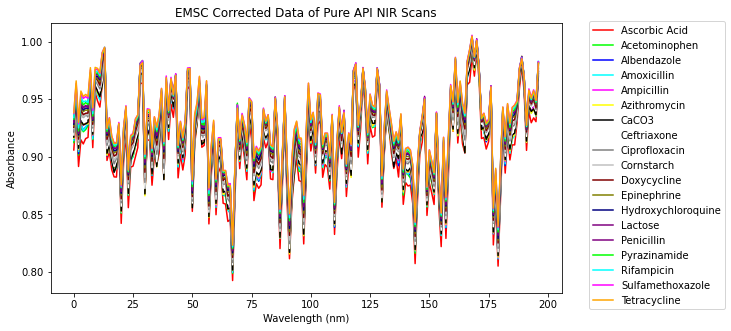

In [13]:
# Load spectral data
spectra_dece_EMSC = pd.read_csv(r'Pooled_Averaged_API_Runs_No_1_Col.csv')
spectra_dece_EMSC = pd.DataFrame(spectra_dece_EMSC)
spectra_dece_EMSC = spectra_dece_EMSC.values[0:, 0:].T 
num_spectra, num_wavelengths = spectra_dece_EMSC.shape

# Calculate reference spectrum
reference_spectrum = np.mean(spectra_dece_EMSC, axis=0)

# Calculate scatter factors
smoothed_reference = pd.Series(reference_spectrum).rolling(window=10, min_periods=1, center=True).mean()
scatter_factors = reference_spectrum / smoothed_reference

# Perform EMSC correction
corrected_spectra = np.zeros_like(spectra_dece_EMSC)
for i in range(num_spectra):
    spectrum = spectra_dece_EMSC[i, :]
    multiplicative_scatter = spectrum / scatter_factors
    additive_scatter = spectrum - multiplicative_scatter
    corrected_spectrum = spectrum - additive_scatter
    corrected_spectra[i, :] = corrected_spectrum

# Plot EMSC-corrected spectra
wavelengths = np.arange(num_wavelengths)  # Assuming wavelength values are linearly spaced
fig, ax = plt.subplots(figsize=(8, 4.7))
colors = ['#FF0000', '#00FF00', '#0000FF', '#00FFFF', '#FF00FF','#FFFF00','#000000','#FFFFFF','#808080','#C0C0C0','#800000','#808000','#000080','#800080','#800080','#00FF00','#00FFFF','#FF00FF','#FFA500'] 
labels = ['Ascorbic Acid', 'Acetominophen', 'Albendazole', 'Amoxicillin', 'Ampicillin','Azithromycin','CaCO3','Ceftriaxone','Ciprofloxacin','Cornstarch','Doxycycline','Epinephrine','Hydroxychloroquine','Lactose','Penicillin','Pyrazinamide','Rifampicin','Sulfamethoxazole','Tetracycline']  
for i in range(19): 
    ax.plot(wavelengths, corrected_spectra[i, :], label=labels[i], color=colors[i])
    

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("EMSC Corrected Data of Pure API NIR Scans")

# Fix legend
hand, labl = ax.get_legend_handles_labels()
handout = []
lablout = []
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout()
plt.show()

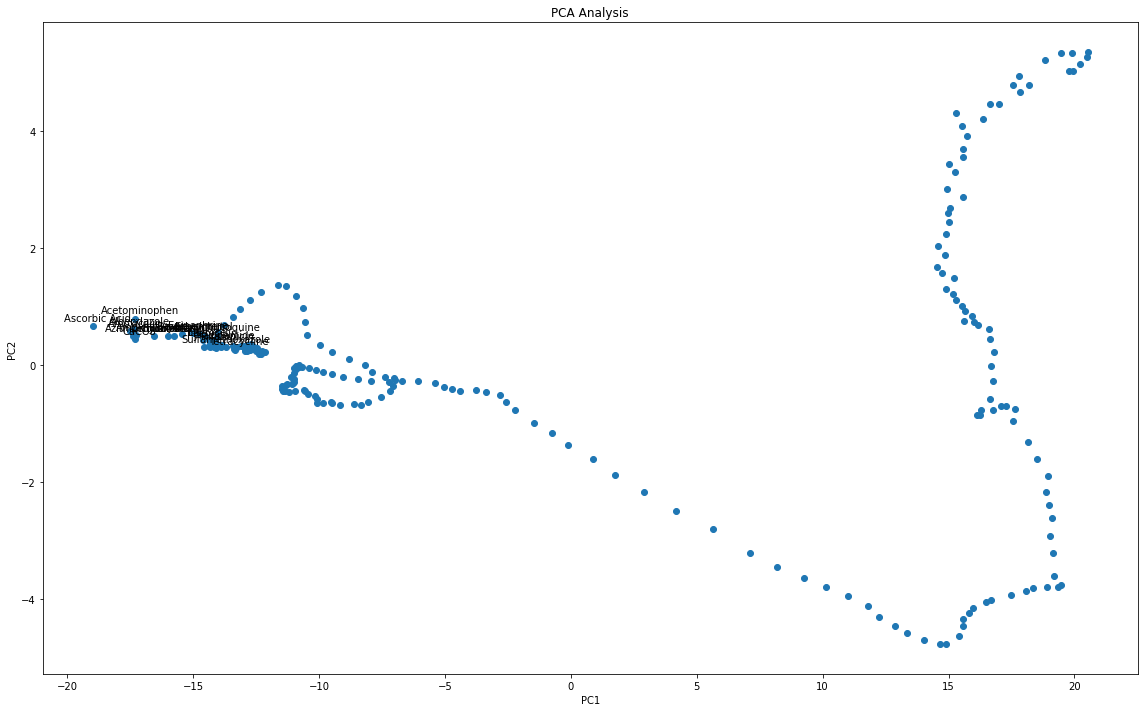

In [14]:


# Combine the individual SNV spectra
combined_data = np.hstack((Ascorbic_Acid_SNV, Acetominophen_SNV, Albendazole_SNV, Amoxicillin_SNV,
                          Ampicillin_SNV, Azithromycin_SNV, CaCO3_SNV, Ceftriaxone_SNV,
                          Ciprofloxacin_SNV, Cornstarch_SNV, Doxycycline_SNV, Epinephrine_SNV,
                          Ethambutol_SNV, Hydroxychloroquine_SNV, Lactose_SNV, Penicillin_SNV,
                          Pyrazinamide_SNV, Rifampicin_SNV, Sulfamethoxazole_SNV, Tetracycline_SNV))

# Perform PCA
pca = PCA(n_components=2)  # Choose the number of components you want to keep
pca_result = pca.fit_transform(combined_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(pca_df['PC1'], pca_df['PC2'])

# Add labels for each data point
labels = ['Ascorbic Acid', 'Acetominophen', 'Albendazole', 'Amoxicillin', 'Ampicillin',
          'Azithromycin', 'CaCO3', 'Ceftriaxone', 'Ciprofloxacin', 'Cornstarch',
          'Doxycycline', 'Epinephrine', 'Ethambutol', 'Hydroxychloroquine', 'Lactose',
          'Penicillin', 'Pyrazinamide', 'Rifampicin', 'Sulfamethoxazole', 'Tetracycline']

for i, label in enumerate(labels):
    ax.annotate(label, (pca_df['PC1'][i], pca_df['PC2'][i]), textcoords="offset points", xytext=(5,5), ha='center')

# Set axis labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Analysis')

plt.tight_layout()
plt.show()


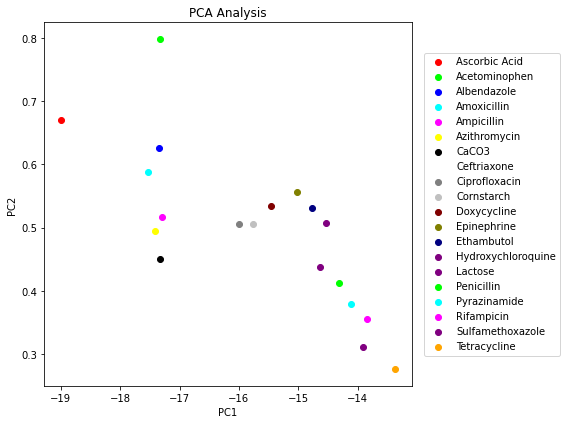

In [15]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine the individual SNV spectra
combined_data = np.hstack((Ascorbic_Acid_SNV, Acetominophen_SNV, Albendazole_SNV, Amoxicillin_SNV,
                          Ampicillin_SNV, Azithromycin_SNV, CaCO3_SNV, Ceftriaxone_SNV,
                          Ciprofloxacin_SNV, Cornstarch_SNV, Doxycycline_SNV, Epinephrine_SNV,
                          Ethambutol_SNV, Hydroxychloroquine_SNV, Lactose_SNV, Penicillin_SNV,
                          Pyrazinamide_SNV, Rifampicin_SNV, Sulfamethoxazole_SNV, Tetracycline_SNV))

# Perform PCA
pca = PCA(n_components=2)  # Choose the number of components you want to keep
pca_result = pca.fit_transform(combined_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results with labeled clusters
fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for each medicine
colors = ['#FF0000', '#00FF00', '#0000FF', '#00FFFF', '#FF00FF', '#FFFF00', '#000000',
          '#FFFFFF', '#808080', '#C0C0C0', '#800000', '#808000', '#000080', '#800080',
          '#800080', '#00FF00', '#00FFFF', '#FF00FF', '#800080', '#FFA500']

# Plot each medicine as a separate cluster
for i, label in enumerate(labels):
    ax.scatter(pca_df['PC1'][i], pca_df['PC2'][i], color=colors[i], label=label)

# Set axis labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Analysis')

# Position the legend
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout()
plt.show()


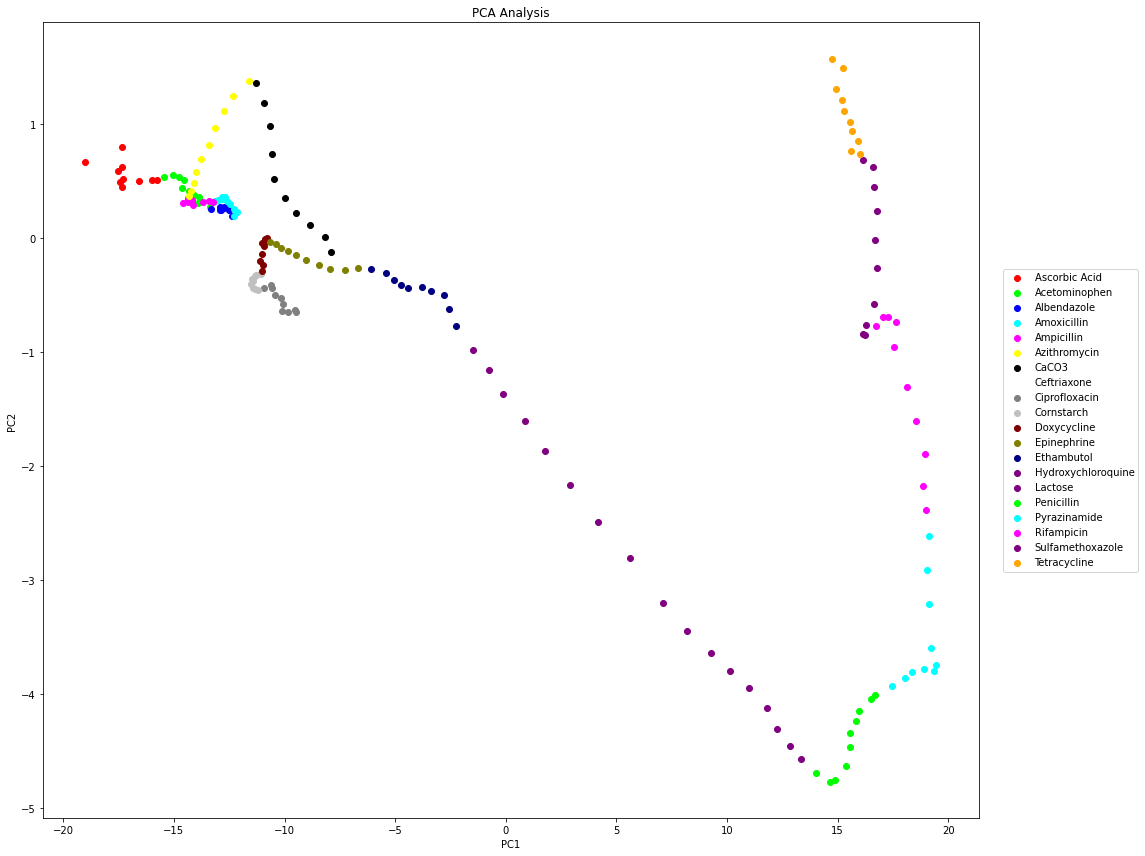

In [16]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Combine the individual SNV spectra
spectra = [Ascorbic_Acid_SNV, Acetominophen_SNV, Albendazole_SNV, Amoxicillin_SNV, Ampicillin_SNV,
           Azithromycin_SNV, CaCO3_SNV, Ceftriaxone_SNV, Ciprofloxacin_SNV, Cornstarch_SNV,
           Doxycycline_SNV, Epinephrine_SNV, Ethambutol_SNV, Hydroxychloroquine_SNV, Lactose_SNV,
           Penicillin_SNV, Pyrazinamide_SNV, Rifampicin_SNV, Sulfamethoxazole_SNV, Tetracycline_SNV]

combined_data = np.hstack(spectra)

# Perform PCA
pca = PCA(n_components=2)  # Choose the number of components you want to keep
pca_result = pca.fit_transform(combined_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results with individual spectra
fig, ax = plt.subplots(figsize=(16, 12))

# Define colors for each spectrum
colors = ['#FF0000', '#00FF00', '#0000FF', '#00FFFF', '#FF00FF', '#FFFF00', '#000000',
          '#FFFFFF', '#808080', '#C0C0C0', '#800000', '#808000', '#000080', '#800080',
          '#800080', '#00FF00', '#00FFFF', '#FF00FF', '#800080', '#FFA500']

# Plot each spectrum as a separate point
start_index = 0
for i, label in enumerate(labels):
    num_spectra = spectra[i].shape[1]
    end_index = start_index + num_spectra
    ax.scatter(pca_df['PC1'][start_index:end_index], pca_df['PC2'][start_index:end_index],
               color=colors[i], label=label)
    start_index = end_index

# Set axis labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Analysis')

# Position the legend
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout()
plt.show()




In [17]:
#Support Vector Machine (SVM) is a supervised machine learning algorithm used for classificiation and regression tasks. It can be used for both binary classification where the goal is to assign data poitns to one of two classes, and multi-class classification, where the goal is to assign data points to one of multiple classes
#Main idea is to find the best hyperplane that separates the data points of different classes in a high-dimensional space
#hyperplane is chosen in such a way that the margin, which is the distance between the hyperplane and the nearest data points of each class is maximized. 
#data points closest to the hyperplane are called support vectors
#SVM can handle both linearly separable data and non-linear data using different kernels 
#kernel function allows SVM to implicitly map the input data into a higher dimensional space where it may become linearly separable 
#Common kernel functions used with SVM include 1. Linear Kernel, 2. Polynomial Kernel, 3. Radial Basis Function (RBF) Kernel 
# This is essentially an optimization problem, which maximizes hte margin while minimizing the classification error 

#Goal is to use #SNV-SG data to classify using support vector machine classification 

In [18]:
#Support Vector Machine Classification (SVM) of SNV+SG 
import pandas as pd
from sklearn import svm

# Visual inspection of line plot of the SNV+SG Pure API
Xsnv_sg_dece = savgol_filter(spectra_dece_snv, 21, polyorder=2, deriv=2)
spectra_snvsg_dece = pd.DataFrame(Xsnv_sg_dece)
spectra_snvsg_dece = spectra_snvsg_dece.values[0:, 0:]
spectra_T_dece = spectra_snvsg_dece.T


# Define the training data and labels
labels_df = pd.read_csv('API_Pooled_Averaged_List.csv')

X_snvsg_API = spectra_snvsg_dece
y_snvsg_API = labels_df['Label'].tolist()
X_train_API,X_test_API,y_train_API,y_test_API = train_test_split(X_snvsg_API,y_snvsg_API,random_state=0,test_size=0.3)

# Initialize the SVM classifier
clf = svm.SVC()

# Train the classifier
clf.fit(X_train_API, y_train_API)

# Predict labels for the training data
y_pred = clf.predict(X_test_API)

# Create a DataFrame with the predicted labels
results = pd.DataFrame({'Predicted': y_pred})

# Save the results to a CSV file
results.to_csv('pooled_classification_results.csv', index=False)


### Confusion Matrix (CM) for SNV+SG

In [19]:
from sklearn.metrics import confusion_matrix 

In [20]:
confusion_matrix(y_test_API,y_pred)

array([[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0,

In [21]:
#The above format is difficult to read and make conclusive information about


In [22]:
#getting dataframe labels 
from sklearn.utils.multiclass import unique_labels 
unique_labels(y_test_API) #Labels are given in their alphabetical order

array(['ACE', 'ALB', 'AMO', 'AMP', 'ASC', 'AZI', 'CEF', 'CIP', 'COR',
       'CaCO3', 'DOX', 'EPI', 'ETH', 'HYD', 'LAC', 'PEN', 'PYR', 'RIF',
       'SUL', 'TET'], dtype='<U5')

In [23]:
#combine these labels with the confusion matrix 

In [24]:
def plot(y_test_API,y_pred):
    labels = unique_labels(y_train_API) #using this because I dont think the test picked up on all 20 pharmaceuticals
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test_API, y_pred), 
                         columns=column, index=indices)
    #this creates a dataframe using the data from the confusion matrix 
    return table

In [25]:
plot(y_test_API,y_pred)

Predicted ACE  Predicted ALB  Predicted AMO  Predicted AMP  \
Actual ACE                3              0              0              0   
Actual ALB                0              3              0              0   
Actual AMO                0              0              3              0   
Actual AMP                0              1              0              2   
Actual ASC                0              0              0              0   
Actual AZI                0              0              0              0   
Actual CEF                0              0              0              0   
Actual CIP                0              0              0              0   
Actual COR                0              0              4              0   
Actual CaCO3              0              0              0              0   
Actual DOX                0              0              0              0   
Actual EPI                0              0              0              0   
Actual ETH                0              0              0              0   
Actual HYD                0              1              2              0   
Actual LAC                0              0              1              0   
Actual PEN                0              0              0              0   
Actual PYR                0              0              0              0   
Actual RIF                0              0              0              0   
Actual SUL                0              0              0              0   
Actual TET                0              0              0              0   

              Predicted ASC  Predicted AZI  Predicted CEF  Predicted CIP  \
Actual ACE                0              0              0              0   
Actual ALB                0              0              0              0   
Actual AMO                0              0              0              0   
Actual AMP                0              0              0              0   
Actual ASC                4              0              0              0   
Actual AZI                0              2              0              0   
Actual CEF                0              0              3              0   
Actual CIP                0              0              0              1   
Actual COR                0              0              0              0   
Actual CaCO3              0              0              4              0   
Actual DOX                0              0              0              0   
Actual EPI                0              0              1              0   
Actual ETH                0              0              0              0   
Actual HYD                0              0              0              0   
Actual LAC                0              0              0              0   
Actual PEN                0              0              0              0   
Actual PYR                0              0              0              0   
Actual RIF                0              0              0              0   
Actual SUL                0              0              0              0   
Actual TET                0              0              0              0   

              Predicted COR  Predicted CaCO3  Predicted DOX  Predicted EPI  \
Actual ACE                0                0              0              0   
Actual ALB                0                0              0              0   
Actual AMO                0                0              0              0   
Actual AMP                0                0              0              0   
Actual ASC                0                0              0              0   
Actual AZI                0                0              0              0   
Actual CEF                0                0              0              0   
Actual CIP                0                0              0              0   
Actual COR                0                0              0              0   
Actual CaCO3              0             

In [26]:
#Above table is now easier to read and comprehend
#for another visual reference, I've made a heat map below

In [27]:
import seaborn as sns

def plot2(y_test_API,y_pred):
    labels = unique_labels(y_train_API) #using this because I dont think the test picked up on all 20 pharmaceuticals
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test_API, y_pred), 
                         columns=column, index=indices)
    # Calculate the total number of predictions
    total_predictions = np.sum(np.sum(table))
    
    # Calculate the number of correct predictions
    correct_predictions = np.trace(table)
    
    # Calculate the percentage of correct predictions
    percentage_correct = correct_predictions / total_predictions * 100
    
    print(f"Correct predictions: {correct_predictions}")
    print(f"Total predictions: {total_predictions}")
    print(f"Percentage correctly predicted: {percentage_correct:.2f}%")
    #this creates a dataframe using the data from the confusion matrix 
    return sns.heatmap(table,annot=True,fmt='d',cmap='viridis')

Correct predictions: 46
Total predictions: 60
Percentage correctly predicted: 76.67%


<AxesSubplot:>

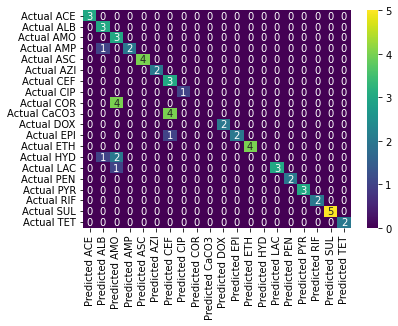

In [28]:
plot2(y_test_API,y_pred)

In [29]:
#Support Vector Machine Classification (SVM) of SNV
import pandas as pd
from sklearn import svm

# Visual inspection of line plot of the SNV Pure API
data_snv = pd.read_csv(r'Pooled_Averaged_API_Runs_No_1_Col.csv')
x_snv= data_snv.values[0:,0:]
spectra_snv = snv(x_snv)

spectra_snv = pd.DataFrame(x_snv)
spectra_snv = spectra_snv.values[0:,0:]

# Define the training data and labels
labels_df = pd.read_csv('API_Pooled_Averaged_List.csv')

X_snv_API = spectra_snv
y_snv_API = labels_df['Label'].tolist()
X_train_SNV_API,X_test_SNV_API,y_train_SNV_API,y_test_SNV_API = train_test_split(X_snv_API,y_snv_API,random_state=0,test_size=0.3)

# Initialize the SVM classifier
clf_snv = svm.SVC()

# Train the classifier
clf_snv.fit(X_train_SNV_API, y_train_SNV_API)

# Predict labels for the training data
y_pred_SNV = clf_snv.predict(X_test_SNV_API)

# Create a DataFrame with the predicted labels
results = pd.DataFrame({'Predicted': y_pred_SNV})

# Save the results to a CSV file
results.to_csv('pooled_classification_results_SNV.csv', index=False)


In [30]:
#Confusion Matrix for SNV

In [31]:
from sklearn.metrics import confusion_matrix 

In [32]:
#getting dataframe labels 
from sklearn.utils.multiclass import unique_labels 
unique_labels(y_test_SNV_API) #Labels are given in their alphabetical order

array(['ACE', 'ALB', 'AMO', 'AMP', 'ASC', 'AZI', 'CEF', 'CIP', 'COR',
       'CaCO3', 'DOX', 'EPI', 'ETH', 'HYD', 'LAC', 'PEN', 'PYR', 'RIF',
       'SUL', 'TET'], dtype='<U5')

In [33]:
#combine these labels with the confusion matrix 

In [34]:
def plot3(y_test_SNV_API,y_SNV_pred):
    labels = unique_labels(y_train_SNV_API) #using this because I dont think the test picked up on all 20 pharmaceuticals
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test_SNV_API, y_pred_SNV), 
                         columns=column, index=indices)
    #this creates a dataframe using the data from the confusion matrix 
    return table

In [35]:
plot3(y_test_SNV_API,y_pred_SNV)

Predicted ACE  Predicted ALB  Predicted AMO  Predicted AMP  \
Actual ACE                1              0              0              0   
Actual ALB                0              0              0              0   
Actual AMO                0              0              0              0   
Actual AMP                0              0              0              0   
Actual ASC                0              0              0              0   
Actual AZI                0              0              0              0   
Actual CEF                0              0              0              0   
Actual CIP                0              0              0              0   
Actual COR                0              0              0              0   
Actual CaCO3              0              0              0              0   
Actual DOX                0              0              0              0   
Actual EPI                0              0              0              0   
Actual ETH                0              0              0              0   
Actual HYD                0              0              0              0   
Actual LAC                0              0              0              0   
Actual PEN                0              0              0              0   
Actual PYR                0              0              0              0   
Actual RIF                0              0              0              0   
Actual SUL                0              0              0              0   
Actual TET                0              0              0              0   

              Predicted ASC  Predicted AZI  Predicted CEF  Predicted CIP  \
Actual ACE                0              0              0              0   
Actual ALB                0              0              0              1   
Actual AMO                0              0              0              0   
Actual AMP                0              0              0              1   
Actual ASC                4              0              0              0   
Actual AZI                0              2              0              0   
Actual CEF                0              0              0              2   
Actual CIP                0              0              0              0   
Actual COR                0              2              0              0   
Actual CaCO3              0              0              0              0   
Actual DOX                0              0              0              0   
Actual EPI                0              0              0              2   
Actual ETH                0              1              0              0   
Actual HYD                0              0              0              1   
Actual LAC                0              0              0              0   
Actual PEN                0              0              0              1   
Actual PYR                0              0              0              0   
Actual RIF                0              1              0              1   
Actual SUL                0              0              0              0   
Actual TET                0              0              0              0   

              Predicted COR  Predicted CaCO3  Predicted DOX  Predicted EPI  \
Actual ACE                0                0              1              0   
Actual ALB                0                2              0              0   
Actual AMO                0                0              0              0   
Actual AMP                0                1              0              0   
Actual ASC                0                0              0              0   
Actual AZI                0                0              0              0   
Actual CEF                0                1              0              0   
Actual CIP                0                1              0              0   
Actual COR                0                0              0              0   
Actual CaCO3              0             

In [36]:
import seaborn as sns

def plot4(y_test_SNV_API,y_pred_SNV):
    labels = unique_labels(y_train_SNV_API) #using this because I dont think the test picked up on all 20 pharmaceuticals
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test_SNV_API, y_pred_SNV), 
                         columns=column, index=indices)
    # Calculate the total number of predictions
    total_predictions = np.sum(np.sum(table))
    
    # Calculate the number of correct predictions
    correct_predictions = np.trace(table)
    
    # Calculate the percentage of correct predictions
    percentage_correct = correct_predictions / total_predictions * 100
    
    print(f"Correct predictions: {correct_predictions}")
    print(f"Total predictions: {total_predictions}")
    print(f"Percentage correctly predicted: {percentage_correct:.2f}%")
    #this creates a dataframe using the data from the confusion matrix 
    return sns.heatmap(table,annot=True,fmt='d',cmap='viridis')

Correct predictions: 13
Total predictions: 60
Percentage correctly predicted: 21.67%


<AxesSubplot:>

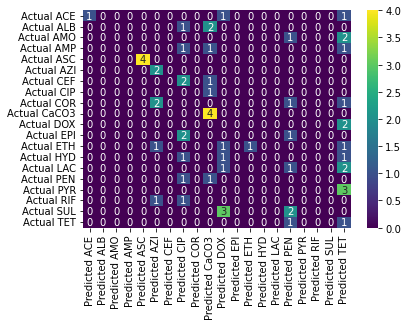

In [37]:
plot4(y_test_SNV_API,y_pred_SNV)

In [38]:
#Random Forest Classification of SNV+SG manipulated data
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# Visual inspection of line plot of the SNV+SG Pure API
Xsnv_sg_RF = savgol_filter(spectra_dece_snv, 21, polyorder=2, deriv=2)
spectra_snvsg_RF = pd.DataFrame(Xsnv_sg_RF)
spectra_snvsg_RF = spectra_snvsg_RF.values[0:, 0:]


# Define the training data and labels
labels_df = pd.read_csv('API_Pooled_Averaged_List.csv')

X_snvsg_API_RF = spectra_snvsg_RF
y_snvsg_API_RF = labels_df['Label'].tolist()
X_train_API_RF,X_test_API_RF,y_train_API_RF,y_test_API_RF = train_test_split(X_snvsg_API_RF,y_snvsg_API_RF,random_state=0,test_size=0.3)

# Initialize the RF classifier
clf4 = RandomForestClassifier()
clf4.fit(X_train_API_RF, y_train_API_RF)

# Predict labels for the training data
y_pred_RF = clf4.predict(X_test_API_RF)

# Create a DataFrame with the predicted labels
results = pd.DataFrame({'Predicted': y_pred_RF})

# Save the results to a CSV file
results.to_csv('pooled_classification_results_SNVSG_RF.csv', index=False)

In [39]:
import seaborn as sns

def plotRF(y_test_API_RF,y_pred_RF):
    labels = unique_labels(y_train_API_RF) #using this because I dont think the test picked up on all 20 pharmaceuticals
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test_API_RF, y_pred_RF), 
                         columns=column, index=indices)
    # Calculate the total number of predictions
    total_predictions = np.sum(np.sum(table))
    
    # Calculate the number of correct predictions
    correct_predictions = np.trace(table)
    
    # Calculate the percentage of correct predictions
    percentage_correct = correct_predictions / total_predictions * 100
    
    print(f"Correct predictions: {correct_predictions}")
    print(f"Total predictions: {total_predictions}")
    print(f"Percentage correctly predicted: {percentage_correct:.2f}%")
    #this creates a dataframe using the data from the confusion matrix 
    return sns.heatmap(table,annot=True,fmt='d',cmap='viridis')

Correct predictions: 60
Total predictions: 60
Percentage correctly predicted: 100.00%


<AxesSubplot:>

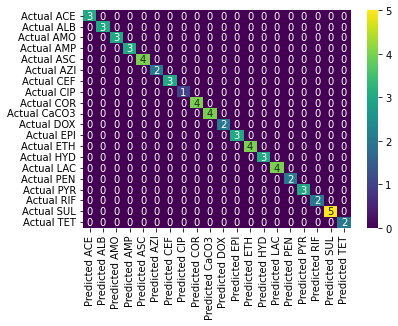

In [40]:
plotRF(y_test_API_RF,y_pred_RF)

In [41]:
#Run 3 Data

In [42]:
def snv(x):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(x)
    for i in range(x.shape[0]):
 
        # Apply correction
        output_data[i,:] = (x[i,:] - np.mean(x[i,:])) / np.std(x[i,:])
 
    return output_data

In [43]:
data_dece_snv_run3 = pd.read_csv(r'Run3_compiled_data_No_1_Col.csv')
x_dece_snv_run3= data_dece_snv_run3.values[:,:]
spectra_dece_snv_run3 = snv(x_dece_snv_run3)

spectra_dece_snv_run3 = pd.DataFrame(spectra_dece_snv_run3)
spectra_dece_snv_run3 = spectra_dece_snv_run3.values[0:,0:]
spectra_dece_snv_run3_T = spectra_dece_snv_run3.T


In [44]:
#Visual inspection of line plot of the SNV+SG Pure API Run#2

Xsnv_sg_dece_run3 = savgol_filter(spectra_dece_snv_run3, 21, polyorder = 2, deriv=2)

spectra_snvsg_dece_run3 = pd.DataFrame(Xsnv_sg_dece_run3)
spectra_snvsg_dece_run3 = spectra_snvsg_dece_run3.values[0:,0:]
spectra_T_dece_run3 = spectra_snvsg_dece_run3.T


In [45]:
import pandas as pd
from scipy.signal import savgol_filter
import joblib

# Load the trained RF model
#clf4 = joblib.load('trained_rf_model.pkl')

# Load the new data
API_2nd_Run = pd.read_csv('Run3_compiled_data_No_1_Col.csv')

#Xsnv_sg_dece_run3 = savgol_filter(spectra_dece_snv_run3, 21, polyorder = 2, deriv=2)

# Make predictions
#y_pred_2nd = clf4.predict(spectra_T_dece_run2)
y_pred_2nd = clf4.predict(Xsnv_sg_dece_run3)

# Save the results to a CSV file
results = pd.DataFrame({'Predicted': y_pred_2nd})
results.to_csv('classification_results_new_data.csv', index=False)

labels_df = pd.read_csv('Run3_List.csv')


In [46]:


# Load the new data
API_3rd_Run = pd.read_csv('Run3_compiled_data_No_1_Col.csv')

Xsnv_sg_dece_run3 = savgol_filter(spectra_dece_snv_run3, 21, polyorder=2, deriv=2)

# Make predictions
y_pred_3rd = clf4.predict(Xsnv_sg_dece_run3)

# Load the actual labels from the additional CSV file
labels_df = pd.read_csv('Run3_List.csv')
actual_labels = labels_df['List']

# Create a confusion matrix
confusion_mat = confusion_matrix(actual_labels, y_pred_3rd)

# Print the confusion matrix
print(confusion_mat)




[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]]


In [47]:
# Define the training data and labels
labels_df = pd.read_csv('Run3_List.csv')
y_3rd_actual = labels_df['List'].tolist()

# Create a DataFrame with the predicted labels
results = pd.DataFrame({'Predicted': y_pred_RF})

import seaborn as sns

def plot_pooled_RF(actual_labels, y_pred_3rd):
    labels = unique_labels(y_3rd_actual) #using this because I dont think the test picked up on all 20 pharmaceuticals
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(actual_labels, y_pred_3rd), 
                         columns=column, index=indices)
    # Calculate the total number of predictions
    total_predictions = np.sum(np.sum(table))
    
    # Calculate the number of correct predictions
    correct_predictions = np.trace(table)
    
    # Calculate the percentage of correct predictions
    percentage_correct = correct_predictions / total_predictions * 100
    
    print(f"Correct predictions: {correct_predictions}")
    print(f"Total predictions: {total_predictions}")
    print(f"Percentage correctly predicted: {percentage_correct:.2f}%")
    #this creates a dataframe using the data from the confusion matrix 
    return sns.heatmap(table,annot=True,fmt='d',cmap='viridis')



Correct predictions: 75
Total predictions: 76
Percentage correctly predicted: 98.68%


<AxesSubplot:>

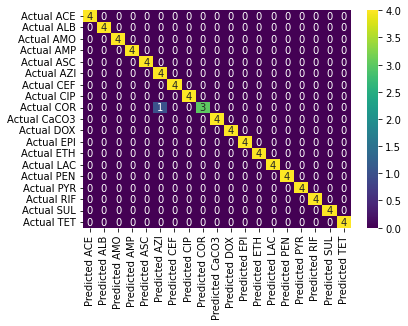

In [48]:
plot_pooled_RF(actual_labels, y_pred_3rd)

In [49]:
#Field Run Data

def snv(x):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(x)
    for i in range(x.shape[0]):
 
        # Apply correction
        output_data[i,:] = (x[i,:] - np.mean(x[i,:])) / np.std(x[i,:])
 
    return output_data

In [50]:
data_dece_snv_fr = pd.read_csv(r'Field-API-Compiled-Averaged-No-1-col.csv')
x_dece_snv_fr = data_dece_snv_fr.values[:,:]
spectra_dece_snv_fr = snv(x_dece_snv_fr)

spectra_dece_snv_fr = pd.DataFrame(spectra_dece_snv_fr)
spectra_dece_snv_fr = spectra_dece_snv_fr.values[0:,0:]
spectra_dece_snv_fr_T = spectra_dece_snv_fr.T


#data_dece_snv_run3 ==> data_dece_snv_fr
#x_dece_snv_run3 ==> x_dece_snv_fr
#spectra_dece_snv_run3 ==> spectra_dece_snv_fr
#spectra_dece_snv_run3_T ==> spectra_dece_snv_fr_T

In [51]:
#Visual inspection of line plot of the SNV+SG Pure API Run#2

Xsnv_sg_dece_fr = savgol_filter(spectra_dece_snv_fr, 21, polyorder = 2, deriv=2)

#spectra_snvsg_dece_fr = pd.DataFrame(Xsnv_sg_dece_fr)
#spectra_snvsg_dece_fr = spectra_snvsg_dece_fr.values[0:,0:]
#spectra_T_dece_fr = spectra_snvsg_dece_fr.T

In [52]:
import pandas as pd
from scipy.signal import savgol_filter
import joblib

# Load the new data
#API_fr = pd.read_csv('Field-API-Compiled-Averaged-No-1-col.csv')

#Xsnv_sg_dece_fr = savgol_filter(spectra_dece_snv_fr, 21, polyorder = 2, deriv=2)

# Make predictions
#y_pred_2nd = clf4.predict(spectra_T_dece_run2)
y_pred_fr = clf4.predict(Xsnv_sg_dece_fr)

# Save the results to a CSV file
results = pd.DataFrame({'Predicted': y_pred_fr})
results.to_csv('classification_results_fr.csv', index=False)

In [53]:
Xsnv_sg_dece_fr = savgol_filter(spectra_dece_snv_fr, 21, polyorder=2, deriv=2)

# Make predictions
#y_pred_fr = clf4.predict(Xsnv_sg_dece_fr)

# Load the actual labels from the additional CSV file
labels_df = pd.read_csv('Field-API-Averaged-List.csv')
actual_labels_fr = labels_df['List']

# Create a confusion matrix
confusion_mat = confusion_matrix(actual_labels_fr, y_pred_fr)

# Print the confusion matrix
print(confusion_mat)




[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0 11  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [54]:
#Because the prediction is so bad, I am going to plot the spectra and see if the pharmaceutical drugs and API are significantly different
data_dece = pd.read_csv(r'Pooled_Averaged_API_Runs_No_1_Col.csv')
x_dece= data_dece.values[:,3:]

wv2 = np.arange(900,1700,3.52)

In [55]:

API_spectra = pd.read_csv(r'Pooled_Averaged_API_Runs_No_1_Col.csv')
Field_spectra = pd.read_csv(r'Field-API-Compiled-Averaged-No-1-col.csv')

API_spectra = pd.DataFrame(API_spectra)
API_spectra = API_spectra.values[0:,0:]
API_spectra_T = API_spectra.T

Field_spectra = pd.DataFrame(Field_spectra)
Field_spectra = Field_spectra.values[0:,0:]
Field_spectra_T = Field_spectra.T

Acetominophen_F =Field_spectra_T[:,0:2]
Albendazole_F =Field_spectra_T[:,3:8]
Amoxicillin_F =Field_spectra_T[:,8:21]
Ampicillin_F =Field_spectra_T[:,21:36]
Azithromycin_F =Field_spectra_T[:,36:39]
Hydroxychloroquine_F =Field_spectra_T[:,39:43]
Ciprofloxacin_F =Field_spectra_T[:,43:47]
Doxycycline_F =Field_spectra_T[:,47:53]

Ascorbic_Acid =API_spectra_T[:,0:10]
Acetominophen =API_spectra_T[:,10:20]
Albendazole =API_spectra_T[:,20:30]
Amoxicillin =API_spectra_T[:,30:40]
Ampicillin =API_spectra_T[:,40:50]
Azithromycin =API_spectra_T[:,50:60]
CaCO3 =API_spectra_T[:,60:70]
Ceftriaxone =API_spectra_T[:,70:80]
Ciprofloxacin =API_spectra_T[:,80:90]
Cornstarch =API_spectra_T[:,90:100]
Doxycycline =API_spectra_T[:,100:110]
Epinephrine =API_spectra_T[:,110:120]
Ethambutol =API_spectra_T[:,120:130]
Hydroxychloroquine =API_spectra_T[:,130:137]
Lactose =API_spectra_T[:,137:147]
Penicillin =API_spectra_T[:,147:157]
Pyrazinamide =API_spectra_T[:,157:167]
Rifampicin =API_spectra_T[:,167:177]
Sulfamethoxazole =API_spectra_T[:,177:187]
Tetracycline =API_spectra_T[:,187:197]

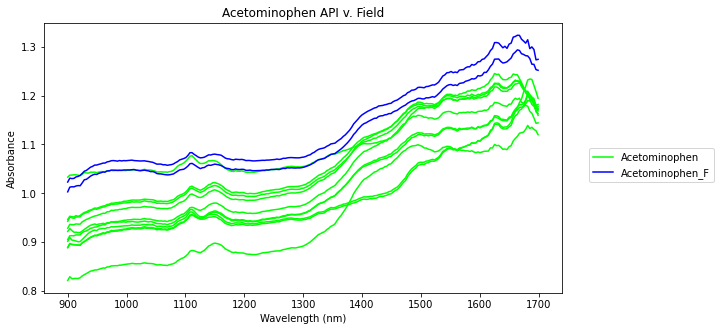

In [56]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Acetominophen, label='Acetominophen',color='#00FF00');
ax.plot(wv, Acetominophen_F, label='Acetominophen_F',color='#0000FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Acetominophen API v. Field")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

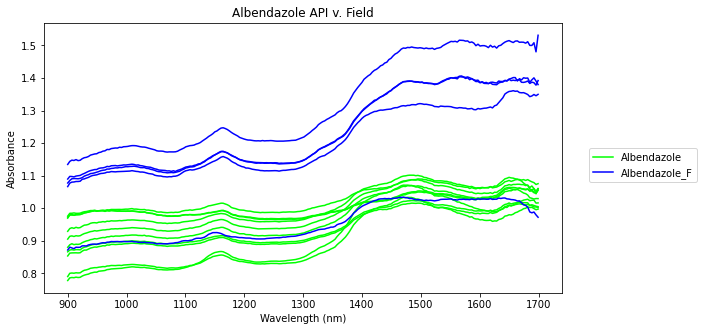

In [57]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Albendazole, label='Albendazole',color='#00FF00');
ax.plot(wv, Albendazole_F, label='Albendazole_F',color='#0000FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Albendazole API v. Field")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

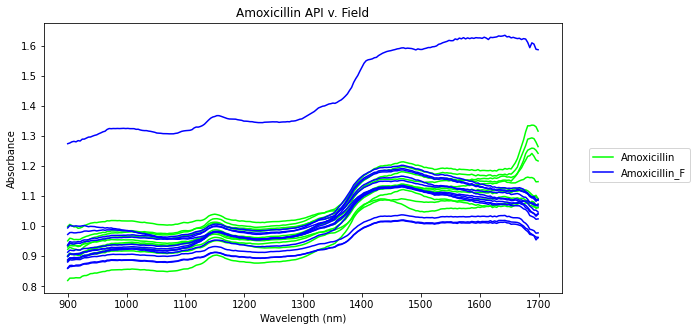

In [58]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Amoxicillin, label='Amoxicillin',color='#00FF00');
ax.plot(wv, Amoxicillin_F, label='Amoxicillin_F',color='#0000FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Amoxicillin API v. Field")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

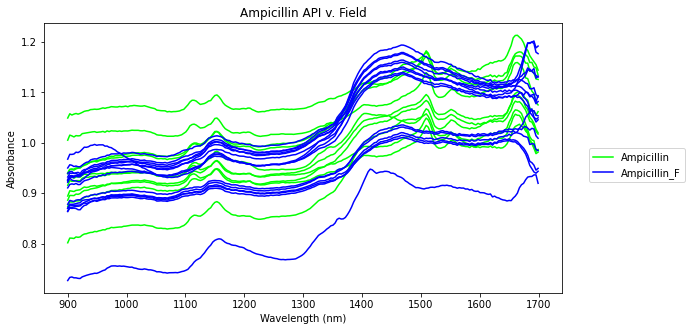

In [59]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ampicillin, label='Ampicillin',color='#00FF00');
ax.plot(wv, Ampicillin_F, label='Ampicillin_F',color='#0000FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Ampicillin API v. Field")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

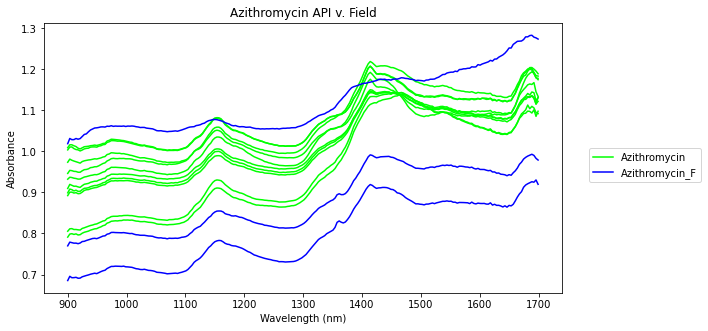

In [60]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Azithromycin, label='Azithromycin',color='#00FF00');
ax.plot(wv, Azithromycin_F, label='Azithromycin_F',color='#0000FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Azithromycin API v. Field")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

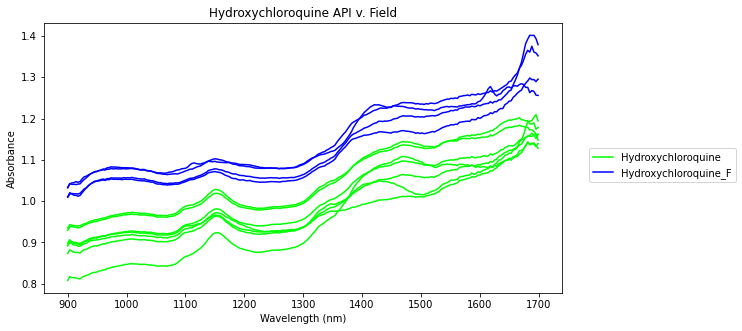

In [61]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Hydroxychloroquine, label='Hydroxychloroquine',color='#00FF00');
ax.plot(wv, Hydroxychloroquine_F, label='Hydroxychloroquine_F',color='#0000FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Hydroxychloroquine API v. Field")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

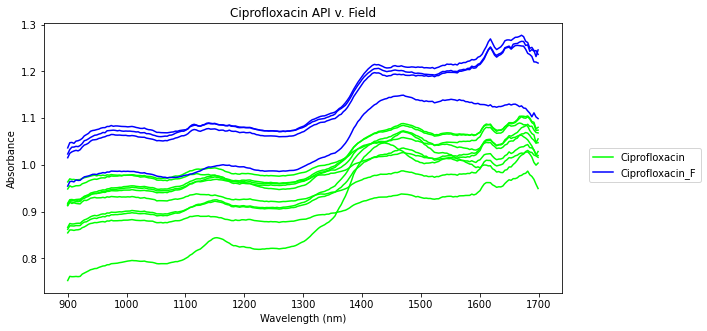

In [62]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ciprofloxacin, label='Ciprofloxacin',color='#00FF00');
ax.plot(wv, Ciprofloxacin_F, label='Ciprofloxacin_F',color='#0000FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Ciprofloxacin API v. Field")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

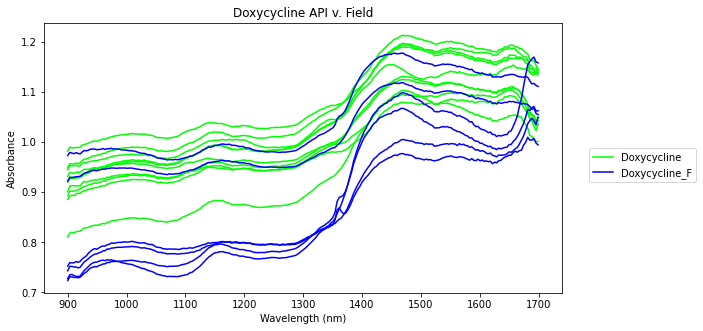

In [63]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Doxycycline, label='Doxycycline',color='#00FF00');
ax.plot(wv, Doxycycline_F, label='Doxycycline_F',color='#0000FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Doxycycline API v. Field")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

In [64]:
#SNV Transformed Comparison

In [65]:
data_dece_snv = pd.read_csv(r'Pooled_Averaged_API_Runs_No_1_Col.csv')
x_dece_snv= data_dece_snv.values[:,:]
spectra_dece_snv = snv(x_dece_snv)

spectra_dece_snv = pd.DataFrame(spectra_dece_snv)
spectra_dece_snv = spectra_dece_snv.values[0:,0:]
spectra_dece_snv_T = spectra_dece_snv.T

field_data_dece_snv = pd.read_csv(r'Field-API-Compiled-Averaged-No-1-col.csv')
field_x_dece_snv= field_data_dece_snv.values[:,:]
field_dece_snv = snv(field_x_dece_snv)

field_dece_snv = pd.DataFrame(field_dece_snv)
field_dece_snv = field_dece_snv.values[0:,0:]
field_dece_snv_T = field_dece_snv.T

Acetominophen_SNV_F =field_dece_snv_T[:,0:2]
Albendazole_SNV_F =field_dece_snv_T[:,2:7]
Amoxicillin_SNV_F =field_dece_snv_T[:,7:20]
Ampicillin_SNV_F =field_dece_snv_T[:,20:35]
Azithromycin_SNV_F =field_dece_snv_T[:,35:38]
Hydroxychloroquine_SNV_F =field_dece_snv_T[:,38:42]
Ciprofloxacin_SNV_F =field_dece_snv_T[:,42:46]
Doxycycline_SNV_F =field_dece_snv_T[:,46:52]

Ascorbic_Acid_SNV =spectra_dece_snv_T[:,0:10]
Acetominophen_SNV =spectra_dece_snv_T[:,10:20]
Albendazole_SNV =spectra_dece_snv_T[:,20:30]
Amoxicillin_SNV =spectra_dece_snv_T[:,30:40]
Ampicillin_SNV =spectra_dece_snv_T[:,40:50]
Azithromycin_SNV =spectra_dece_snv_T[:,50:60]
CaCO3_SNV =spectra_dece_snv_T[:,60:70]
Ceftriaxone_SNV =spectra_dece_snv_T[:,70:80]
Ciprofloxacin_SNV =spectra_dece_snv_T[:,80:90]
Cornstarch_SNV =spectra_dece_snv_T[:,90:100]
Doxycycline_SNV =spectra_dece_snv_T[:,100:110]
Epinephrine_SNV =spectra_dece_snv_T[:,110:120]
Ethambutol_SNV =spectra_dece_snv_T[:,120:130]
Hydroxychloroquine_SNV =spectra_dece_snv_T[:,130:137]
Lactose_SNV =spectra_dece_snv_T[:,137:147]
Penicillin_SNV =spectra_dece_snv_T[:,147:157]
Pyrazinamide_SNV =spectra_dece_snv_T[:,157:167]
Rifampicin_SNV =spectra_dece_snv_T[:,167:177]
Sulfamethoxazole_SNV =spectra_dece_snv_T[:,177:187]
Tetracycline_SNV =spectra_dece_snv_T[:,187:197]

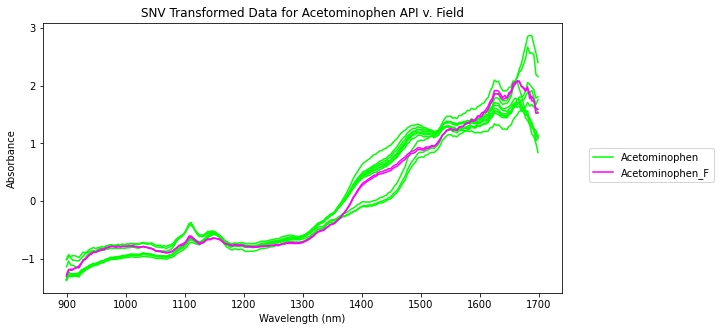

In [66]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, Acetominophen_SNV, label='Acetominophen',color='#00FF00');
ax.plot(wv, Acetominophen_SNV_F, label='Acetominophen_F',color='#FF00FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Acetominophen API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

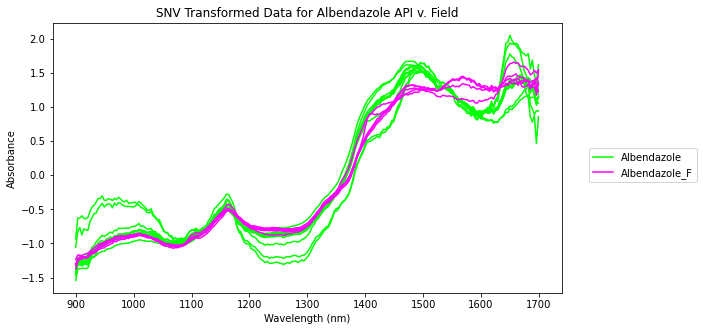

In [67]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, Albendazole_SNV, label='Albendazole',color='#00FF00');
ax.plot(wv, Albendazole_SNV_F, label='Albendazole_F',color='#FF00FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Albendazole API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

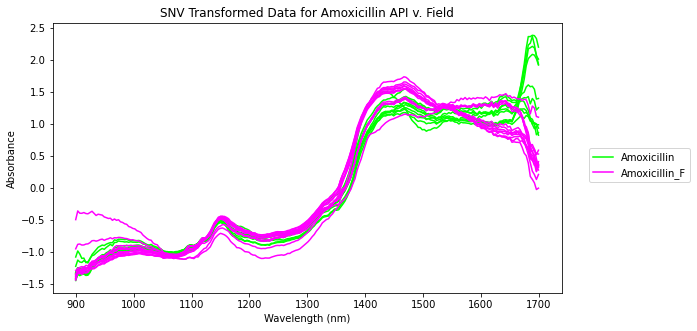

In [68]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, Amoxicillin_SNV, label='Amoxicillin',color='#00FF00');
ax.plot(wv, Amoxicillin_SNV_F, label='Amoxicillin_F',color='#FF00FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Amoxicillin API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

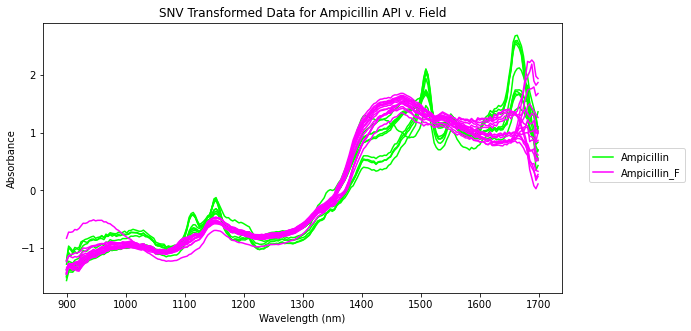

In [69]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, Ampicillin_SNV, label='Ampicillin',color='#00FF00');
ax.plot(wv, Ampicillin_SNV_F, label='Ampicillin_F',color='#FF00FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Ampicillin API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

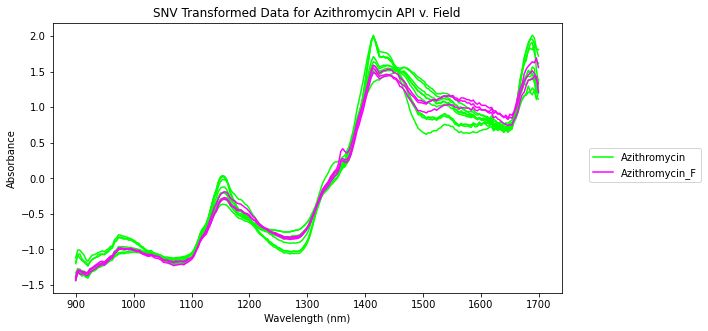

In [70]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, Azithromycin_SNV, label='Azithromycin',color='#00FF00');
ax.plot(wv, Azithromycin_SNV_F, label='Azithromycin_F',color='#FF00FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Azithromycin API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

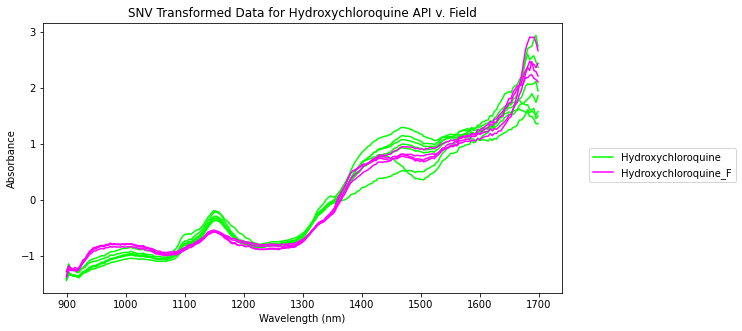

In [71]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, Hydroxychloroquine_SNV, label='Hydroxychloroquine',color='#00FF00');
ax.plot(wv, Hydroxychloroquine_SNV_F, label='Hydroxychloroquine_F',color='#FF00FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Hydroxychloroquine API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

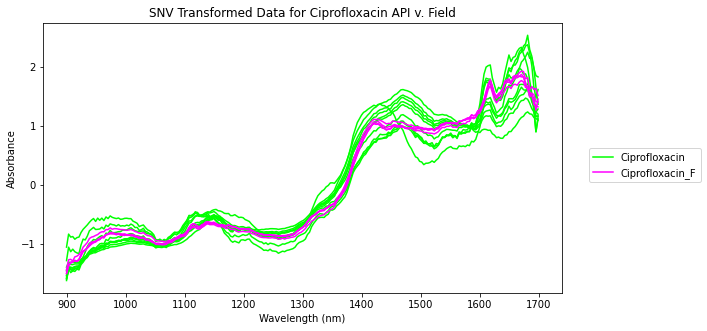

In [72]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, Ciprofloxacin_SNV, label='Ciprofloxacin',color='#00FF00');
ax.plot(wv, Ciprofloxacin_SNV_F, label='Ciprofloxacin_F',color='#FF00FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Ciprofloxacin API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

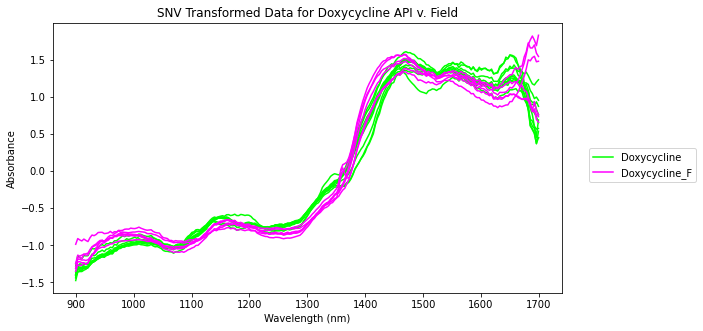

In [73]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, Doxycycline_SNV, label='Doxycycline',color='#00FF00');
ax.plot(wv, Doxycycline_SNV_F, label='Doxycycline_F',color='#FF00FF');
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Doxycycline API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

In [74]:
#SNV-SG transformation Comparison

In [75]:
#Visual inspection of line plot of the SNV+SG Pure API

Xsnv_sg_dece = savgol_filter(spectra_dece_snv, 21, polyorder = 2, deriv=2)
field_Xsnv_sg_dece = savgol_filter(field_dece_snv, 21, polyorder = 2, deriv=2)

spectra_snvsg_dece = pd.DataFrame(Xsnv_sg_dece)
spectra_snvsg_dece = spectra_snvsg_dece.values[0:,0:]
spectra_T_dece = spectra_snvsg_dece.T

field_snvsg_dece = pd.DataFrame(field_Xsnv_sg_dece)
field_snvsg_dece = field_snvsg_dece.values[0:,0:]
field_T_dece = field_snvsg_dece.T

Ascorbic_Acid_SNVSG =spectra_T_dece[:,0:10]
Acetominophen_SNVSG =spectra_T_dece[:,10:20]
Albendazole_SNVSG =spectra_T_dece[:,20:30]
Amoxicillin_SNVSG =spectra_T_dece[:,30:40]
Ampicillin_SNVSG =spectra_T_dece[:,40:50]
Azithromycin_SNVSG =spectra_T_dece[:,50:60]
CaCO3_SNVSG =spectra_T_dece[:,60:70]
Ceftriaxone_SNVSG =spectra_T_dece[:,70:80]
Ciprofloxacin_SNVSG =spectra_T_dece[:,80:90]
Cornstarch_SNVSG =spectra_T_dece[:,90:100]
Doxycycline_SNVSG =spectra_T_dece[:,100:110]
Epinephrine_SNVSG =spectra_T_dece[:,110:120]
Ethambutol_SNVSG =spectra_T_dece[:,120:130]
Hydroxychloroquine_SNVSG =spectra_T_dece[:,130:137]
Lactose_SNVSG =spectra_T_dece[:,137:147]
Penicillin_SNVSG =spectra_T_dece[:,147:157]
Pyrazinamide_SNVSG =spectra_T_dece[:,157:167]
Rifampicin_SNVSG =spectra_T_dece[:,167:177]
Sulfamethoxazole_SNVSG =spectra_T_dece[:,177:187]
Tetracycline_SNVSG =spectra_T_dece[:,187:197]

Acetominophen_SNVSG_F =field_T_dece[:,0:2]
Albendazole_SNVSG_F =field_T_dece[:,2:7]
Amoxicillin_SNVSG_F =field_T_dece[:,7:20]
Ampicillin_SNVSG_F =field_T_dece[:,20:35]
Azithromycin_SNVSG_F =field_T_dece[:,35:38]
Hydroxychloroquine_SNVSG_F =field_T_dece[:,38:42]
Ciprofloxacin_SNVSG_F =field_T_dece[:,42:46]
Doxycycline_SNVSG_F =field_T_dece[:,46:52]

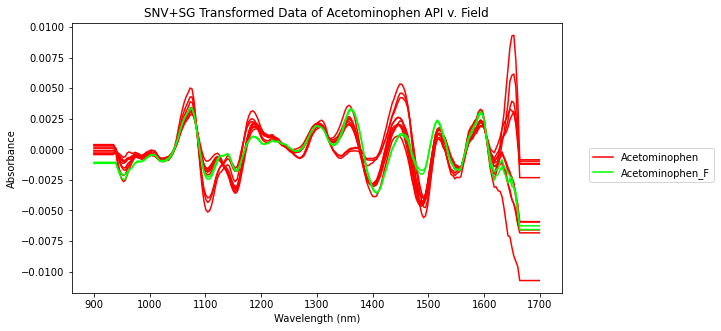

In [76]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Acetominophen_SNVSG, label='Acetominophen',color='#FF0000');
ax.plot(wv, Acetominophen_SNVSG_F, label='Acetominophen_F',color='#00FF00');

plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Acetominophen API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

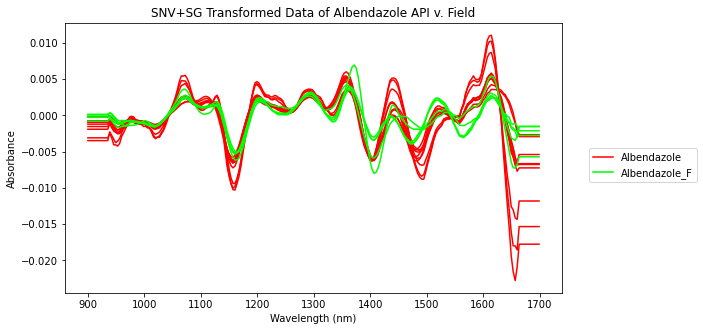

In [77]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Albendazole_SNVSG, label='Albendazole',color='#FF0000');
ax.plot(wv, Albendazole_SNVSG_F, label='Albendazole_F',color='#00FF00');

plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Albendazole API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

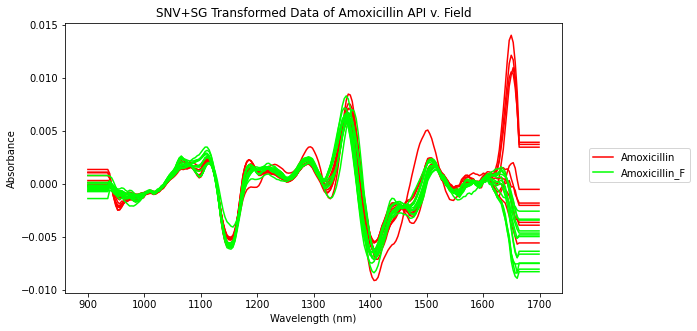

In [78]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Amoxicillin_SNVSG, label='Amoxicillin',color='#FF0000');
ax.plot(wv, Amoxicillin_SNVSG_F, label='Amoxicillin_F',color='#00FF00');

plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Amoxicillin API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

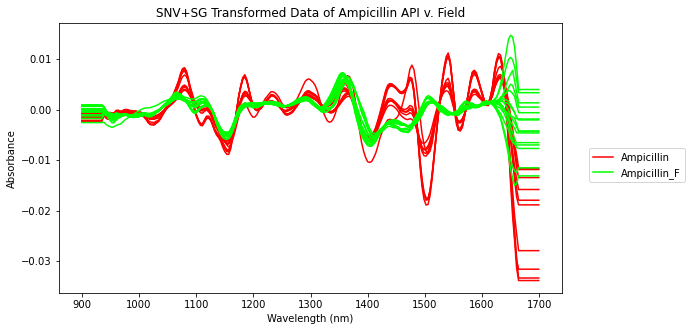

In [79]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ampicillin_SNVSG, label='Ampicillin',color='#FF0000');
ax.plot(wv, Ampicillin_SNVSG_F, label='Ampicillin_F',color='#00FF00');

plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Ampicillin API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

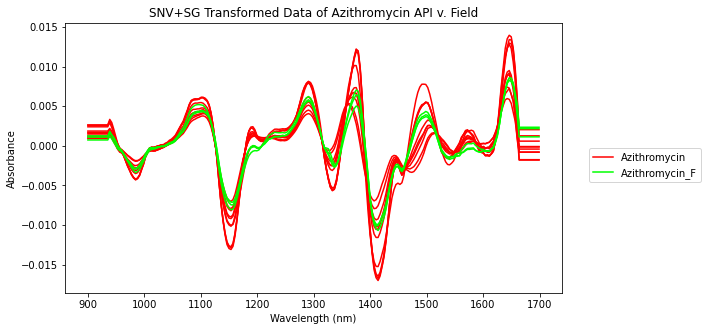

In [80]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Azithromycin_SNVSG, label='Azithromycin',color='#FF0000');
ax.plot(wv, Azithromycin_SNVSG_F, label='Azithromycin_F',color='#00FF00');

plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Azithromycin API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

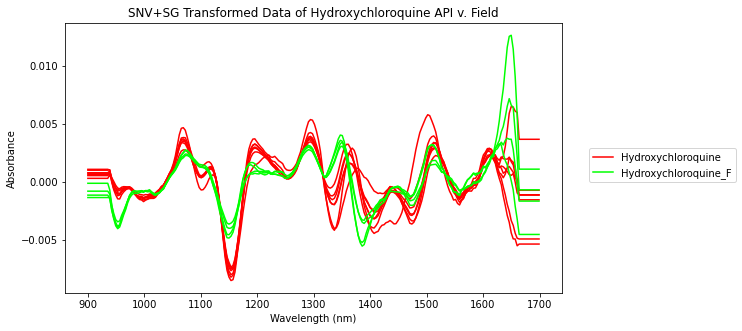

In [81]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Hydroxychloroquine_SNVSG, label='Hydroxychloroquine',color='#FF0000');
ax.plot(wv, Hydroxychloroquine_SNVSG_F, label='Hydroxychloroquine_F',color='#00FF00');

plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Hydroxychloroquine API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

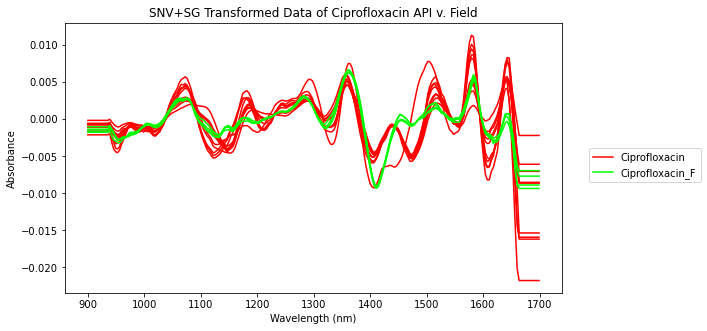

In [82]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ciprofloxacin_SNVSG, label='Ciprofloxacin',color='#FF0000');
ax.plot(wv, Ciprofloxacin_SNVSG_F, label='Ciprofloxacin_F',color='#00FF00');

plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Ciprofloxacin API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

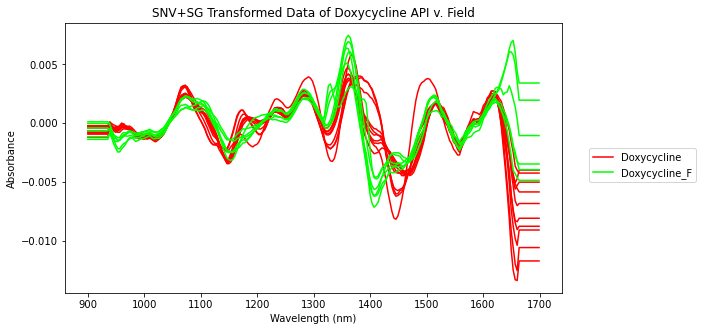

In [83]:
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Doxycycline_SNVSG, label='Doxycycline',color='#FF0000');
ax.plot(wv, Doxycycline_SNVSG_F, label='Doxycycline_F',color='#00FF00');

plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Doxycycline API v. Field")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

In [84]:
#SNV random forest

In [85]:
#Use SNV-SG random forest to predict 
y_pred_fr_ACE = clf4.predict(Acetominophen_SNVSG_F.T)
y_pred_fr_ALB = clf4.predict(Albendazole_SNVSG_F.T)
y_pred_fr_AMO = clf4.predict(Amoxicillin_SNVSG_F.T)
y_pred_fr_AMP = clf4.predict(Ampicillin_SNVSG_F.T)
y_pred_fr_AZI = clf4.predict(Azithromycin_SNVSG_F.T)
y_pred_fr_HYD = clf4.predict(Hydroxychloroquine_SNVSG_F.T)
y_pred_fr_CIP = clf4.predict(Ciprofloxacin_SNVSG_F.T)
y_pred_fr_DOX = clf4.predict(Doxycycline_SNVSG_F.T)

In [86]:
y_pred_fr_ACE #2/2

array(['ACE', 'ACE'], dtype='<U5')

In [87]:
y_pred_fr_ALB #2/5

array(['ALB', 'LAC', 'ALB', 'LAC', 'LAC'], dtype='<U5')

In [88]:
y_pred_fr_AMO #12/13

array(['AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'CEF', 'AMO',
       'AMO', 'AMO', 'CEF', 'AMO'], dtype='<U5')

In [89]:
y_pred_fr_AMP #0/15

array(['AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'AMO',
       'AMO', 'AMO', 'AMO', 'AMO', 'AMO', 'AMO'], dtype='<U5')

In [90]:
y_pred_fr_AZI #3/3

array(['AZI', 'AZI', 'AZI'], dtype='<U5')

In [91]:
y_pred_fr_HYD #0/4

array(['CEF', 'CEF', 'AMO', 'CEF'], dtype='<U5')

In [92]:
y_pred_fr_CIP #4/4

array(['CIP', 'CIP', 'CIP', 'CIP'], dtype='<U5')

In [93]:
y_pred_fr_DOX #3/6

array(['DOX', 'DOX', 'DOX', 'DOX', 'AMO', 'DOX'], dtype='<U5')

In [94]:
#Summary of All the API's we are working on and send email to Max and Rachel who are going to Ethiopia and Malawi to pick up some samples
#Summarize the writing of the papers



In [95]:
Malawi_dece = pd.read_csv(r'compiled_2023-Malawi_NIR.csv')
x_dece= Malawi_dece.values[:,3:]

wv_malawi = np.arange(900,1700,3.52)

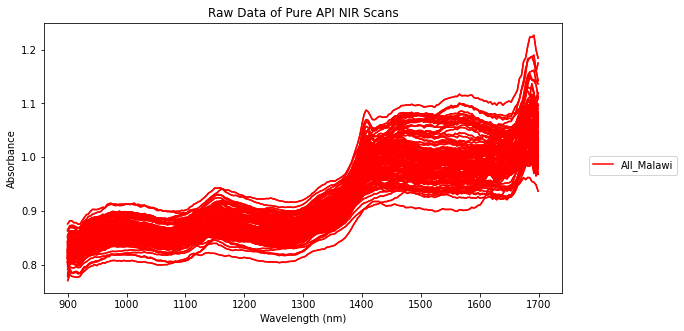

In [96]:

Malawi_dece = pd.read_csv(r'compiled_2023-Malawi_NIR.csv')

Malawi_dece = pd.DataFrame(Malawi_dece)
Malawi_dece = Malawi_dece.values[0:,0:]
Malawi_dece_T = Malawi_dece.T

All_Malawi= Malawi_dece_T[:,0:243]

fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv_malawi, All_Malawi,label='All_Malawi',color='#FF0000');

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Raw Data of Pure API NIR Scans")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

In [97]:
#Visual Analysis: Shows absolutely nothing useful right now

In [98]:
#Now onto SNV!

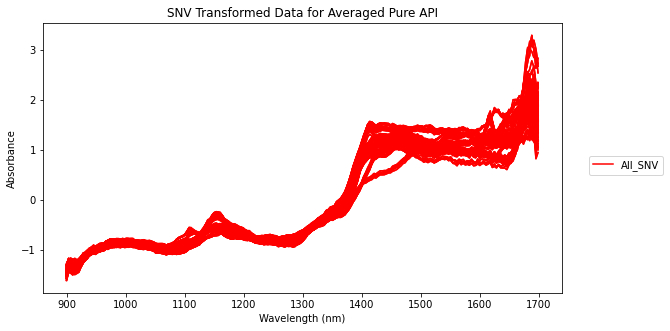

In [99]:

data_Malawi_snv = pd.read_csv(r'compiled_2023-Malawi_NIR.csv')
x_Malawi_snv= data_Malawi_snv.values[:,:]
spectra_Malawi_snv = snv(x_Malawi_snv)

spectra_Malawi_snv = pd.DataFrame(spectra_Malawi_snv)
spectra_Malawi_snv = spectra_Malawi_snv.values[0:,0:]
spectra_Malawi_snv_T = spectra_Malawi_snv.T


All_SNV =spectra_Malawi_snv_T[:,0:]

fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]

ax.plot(wv, All_SNV, label='All_SNV',color='#FF0000');

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for Averaged Pure API")

#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

In [100]:
# Onto SNV+SG

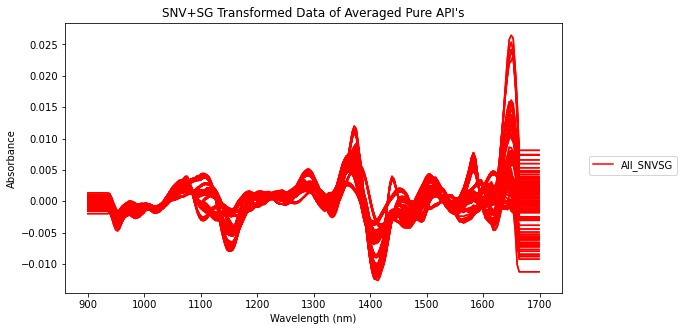

In [101]:
#Visual inspection of line plot of the SNV+SG Pure API

Xsnv_sg_Malawi = savgol_filter(spectra_Malawi_snv, 21, polyorder = 2, deriv=2)

spectra_snvsg_Malawi = pd.DataFrame(Xsnv_sg_Malawi)
spectra_snvsg_Malawi = spectra_snvsg_Malawi.values[0:,0:]
spectra_T_snvsg_Malawi = spectra_snvsg_Malawi.T



All_SNVSG =spectra_T_snvsg_Malawi[:,:]

fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv_malawi, All_SNVSG, label='All_SNVSG',color='#FF0000');

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data for Pure API")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV+SG Transformed Data of Averaged Pure API's")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

In [102]:
y_pred_fr_Malawi = clf4.predict(spectra_snvsg_Malawi)

In [103]:
y_pred_fr_Malawi

array(['CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP',
       'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP',
       'CIP', 'CIP', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'COR',
       'COR', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI',
       'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI',
       'AZI', 'AZI', 'AZI', 'COR', 'COR', 'AZI', 'AZI', 'AZI', 'AZI',
       'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI',
       'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'AZI', 'LAC', 'LAC',
       'LAC', 'LAC', 'LAC', 'LAC', 'LAC', 'LAC', 'LAC', 'LAC', 'LAC',
       'LAC', 'LAC', 'LAC', 'LAC', 'LAC', 'LAC', 'LAC', 'LAC', 'LAC',
       'AMO', 'AMO', 'AMO', 'AMO', 'ACE', 'ACE', 'AMO', 'AMO', 'AMO',
       'AMO', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB', 'ALB',
       'ALB', 'ALB', 'ALB', 'ALB', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP',
       'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP', 'CIP',
       'CIP', 'CIP',

In [104]:
# Create a DataFrame with the predicted labels
results_Malawi = pd.DataFrame({'Predicted': y_pred_fr_Malawi})

# Save the results to a CSV file
results_Malawi.to_csv('Malawi_Predictions.csv', index=False)



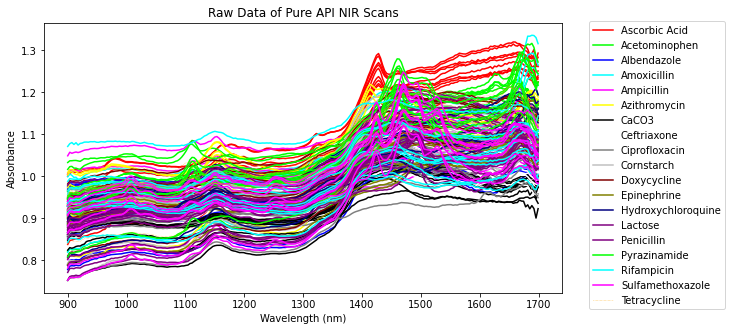

In [105]:

spectra_dece = pd.read_csv(r'Pooled_Averaged_API_Runs_No_1_Col.csv')
#target_dece = pd.read_csv(r'Cipro_conc_mg.csv')

spectra_dece = pd.DataFrame(spectra_dece)
spectra_dece = spectra_dece.values[0:,0:]
spectra_dece_T = spectra_dece.T

Ascorbic_Acid =spectra_dece_T[:,0:10]
Acetominophen =spectra_dece_T[:,10:20]
Albendazole =spectra_dece_T[:,20:30]
Amoxicillin =spectra_dece_T[:,30:40]
Ampicillin =spectra_dece_T[:,40:50]
Azithromycin =spectra_dece_T[:,50:60]
CaCO3 =spectra_dece_T[:,60:70]
Ceftriaxone =spectra_dece_T[:,70:80]
Ciprofloxacin =spectra_dece_T[:,80:90]
Cornstarch =spectra_dece_T[:,90:100]
Doxycycline =spectra_dece_T[:,100:110]
Epinephrine =spectra_dece_T[:,110:120]
Ethambutol =spectra_dece_T[:,120:130]
Hydroxychloroquine =spectra_dece_T[:,130:137]
Lactose =spectra_dece_T[:,137:147]
Penicillin =spectra_dece_T[:,147:157]
Pyrazinamide =spectra_dece_T[:,157:167]
Rifampicin =spectra_dece_T[:,167:177]
Sulfamethoxazole =spectra_dece_T[:,177:187]
Tetracycline =spectra_dece_T[:,187:197]

fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ascorbic_Acid, label='Ascorbic Acid',color='#FF0000');
ax.plot(wv, Acetominophen, label='Acetominophen',color='#00FF00');
ax.plot(wv, Albendazole, label='Albendazole',color='#0000FF');
ax.plot(wv, Amoxicillin, label='Amoxicillin',color='#00FFFF');
ax.plot(wv, Ampicillin, label='Ampicillin',color='#FF00FF');
ax.plot(wv, Azithromycin, label='Azithromycin',color='#FFFF00');
ax.plot(wv, CaCO3, label='CaCO3',color='#000000');
ax.plot(wv, Ceftriaxone, label='Ceftriaxone',color='#FFFFFF');
ax.plot(wv, Ciprofloxacin, label='Ciprofloxacin',color='#808080');
ax.plot(wv, Cornstarch, label='Cornstarch',color='#C0C0C0');
ax.plot(wv, Doxycycline, label='Doxycycline',color='#800000');
ax.plot(wv, Epinephrine, label='Epinephrine',color='#808000');
ax.plot(wv, Hydroxychloroquine, label='Hydroxychloroquine',color='#000080');
ax.plot(wv, Lactose, label='Lactose',color='#800080');
ax.plot(wv, Penicillin, label='Penicillin',color='#800080');
ax.plot(wv, Pyrazinamide, label='Pyrazinamide',color='#00FF00');
ax.plot(wv, Rifampicin, label='Rifampicin',color='#00FFFF');
ax.plot(wv, Sulfamethoxazole, label='Sulfamethoxazole',color='#FF00FF');
ax.plot(wv, Tetracycline, label='Tetracycline',color='#FFA500',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Raw Data of Pure API NIR Scans")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

In [106]:
# Define the training data and labels
labels_df = pd.read_csv('API_Pooled_Averaged_List.csv')

X_snvsg_API_RF = spectra_snvsg_RF
y_snvsg_API_RF = labels_df['Label'].tolist()
X_train_API_RF,X_test_API_RF,y_train_API_RF,y_test_API_RF = train_test_split(X_snvsg_API_RF,y_snvsg_API_RF,random_state=0,test_size=0.3)

In [107]:
data_dece_malawi = pd.read_csv(r'compiled_2023-Malawi_NIR.csv')
x_dece_malawi = data_dece_malawi.values[:,3:]

wv_malawi = np.arange(900,1700,3.52)

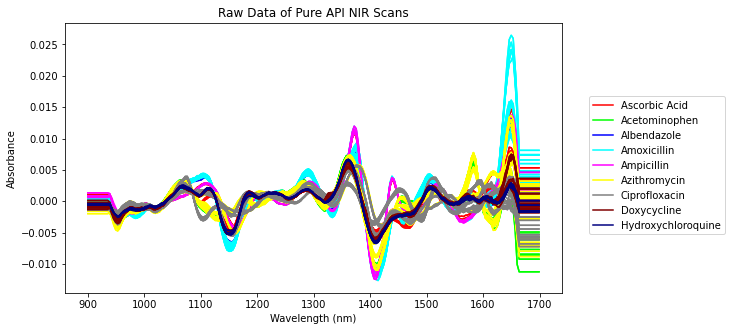

In [108]:
spectra_dece_malawi = pd.read_csv(r'compiled_2023-Malawi_NIR.csv')

spectra_dece_malawi  = pd.DataFrame(spectra_dece_malawi)
spectra_dece_malawi  = spectra_dece_malawi.values[0:,0:]
spectra_dece_malawi_T = spectra_dece_malawi.T

Acetominophen_malawi_snvsg =spectra_T_snvsg_Malawi[:,0:20]
Albendazole_malawi_snvsg =spectra_T_snvsg_Malawi[:,21:32]
Amoxicillin_malawi_snvsg =spectra_T_snvsg_Malawi[:,33:72]
Ampicillin_malawi_snvsg =spectra_T_snvsg_Malawi[:,73:82]
Ascorbic_Acid_malawi_snvsg =spectra_T_snvsg_Malawi[:,83:102]
Azithromycin_malawi_snvsg =spectra_T_snvsg_Malawi[:,103:152]
Ciprofloxacin_malawi_snvsg =spectra_T_snvsg_Malawi[:,153:202]
Doxycycline_malawi_snvsg =spectra_T_snvsg_Malawi[:,203:232]
Hydroxychloroquine_malawi_snvsg =spectra_T_snvsg_Malawi[:,233:242]

fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv_malawi, Ascorbic_Acid_malawi_snvsg, label='Ascorbic Acid',color='#FF0000');
ax.plot(wv_malawi, Acetominophen_malawi_snvsg, label='Acetominophen',color='#00FF00');
ax.plot(wv_malawi, Albendazole_malawi_snvsg, label='Albendazole',color='#0000FF');
ax.plot(wv_malawi, Amoxicillin_malawi_snvsg, label='Amoxicillin',color='#00FFFF');
ax.plot(wv_malawi, Ampicillin_malawi_snvsg, label='Ampicillin',color='#FF00FF');
ax.plot(wv_malawi, Azithromycin_malawi_snvsg, label='Azithromycin',color='#FFFF00');
ax.plot(wv_malawi, Ciprofloxacin_malawi_snvsg, label='Ciprofloxacin',color='#808080');
ax.plot(wv_malawi, Doxycycline_malawi_snvsg, label='Doxycycline',color='#800000');
ax.plot(wv_malawi, Hydroxychloroquine_malawi_snvsg, label='Hydroxychloroquine',color='#000080');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("Raw Data of Pure API NIR Scans")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

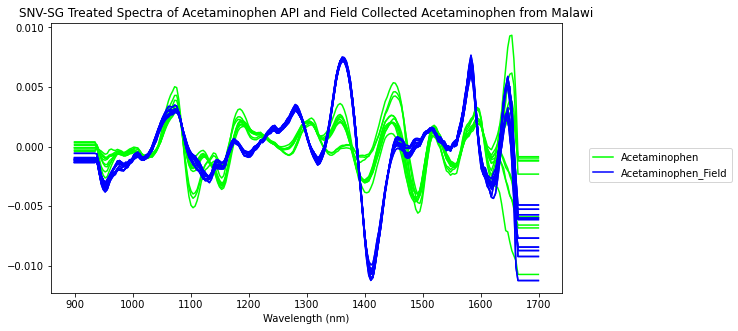

In [132]:
#Acetaminophen Field (Malawi) vs. Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Acetominophen_SNVSG, label='Acetaminophen',color='#00FF00');
ax.plot(wv_malawi, Acetominophen_malawi_snvsg, label='Acetaminophen_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Acetaminophen API and Field Collected Acetaminophen from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

#Note that the API is completely masked by the field sample scans. 

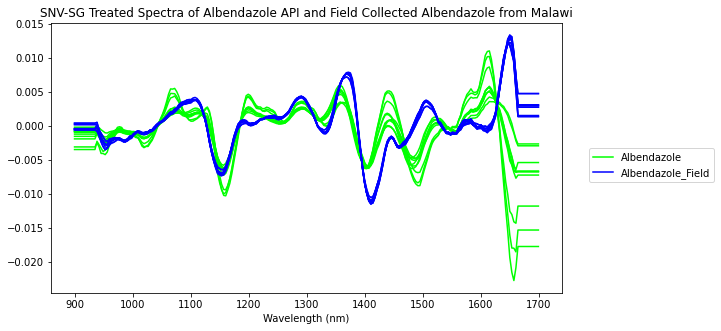

In [133]:
#Albendazole Field (Malawi) vs. Database

fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Albendazole_SNVSG, label='Albendazole',color='#00FF00');
ax.plot(wv_malawi, Albendazole_malawi_snvsg, label='Albendazole_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Albendazole API and Field Collected Albendazole from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()


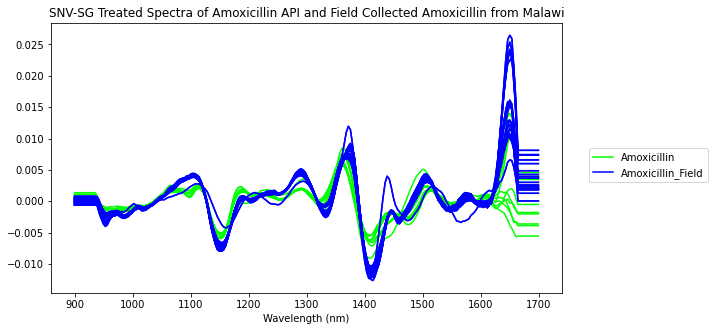

In [134]:
#Amoxicillin Field (Malawi) vs. Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Amoxicillin_SNVSG, label='Amoxicillin',color='#00FF00');
ax.plot(wv_malawi, Amoxicillin_malawi_snvsg, label='Amoxicillin_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Amoxicillin API and Field Collected Amoxicillin from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

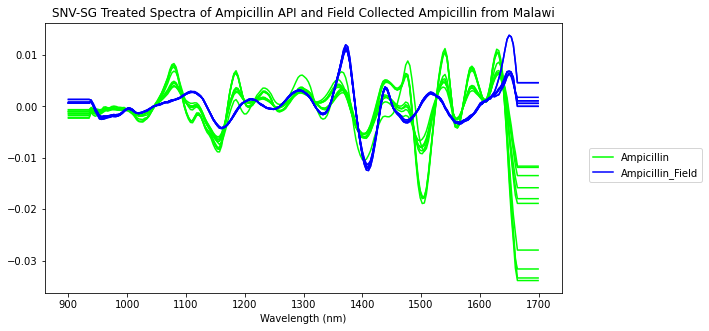

In [135]:
#Ampicillin Field (Malawi) vs. Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ampicillin_SNVSG, label='Ampicillin',color='#00FF00');
ax.plot(wv_malawi, Ampicillin_malawi_snvsg, label='Ampicillin_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Ampicillin API and Field Collected Ampicillin from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

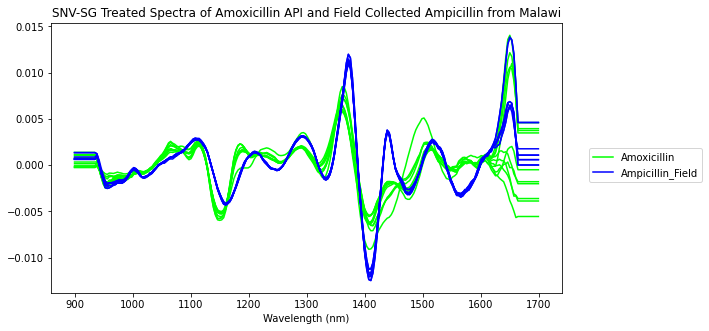

In [136]:
#Ampicillin Field (Malawi) vs. Amoxicillin Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Amoxicillin_SNVSG, label='Amoxicillin',color='#00FF00');
ax.plot(wv_malawi, Ampicillin_malawi_snvsg, label='Ampicillin_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Amoxicillin API and Field Collected Ampicillin from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

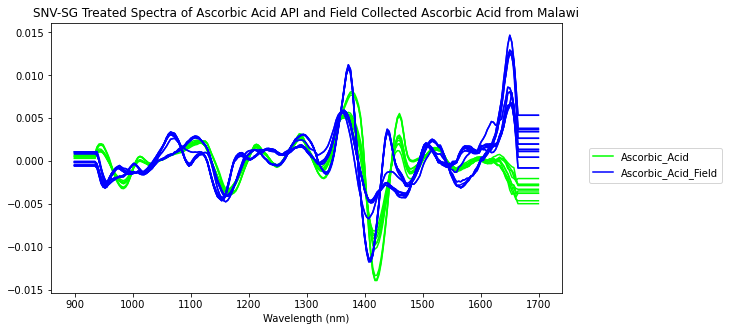

In [137]:
#Ascorbic Acid Field (Malawi) vs. Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ascorbic_Acid_SNVSG, label='Ascorbic_Acid',color='#00FF00');
ax.plot(wv_malawi, Ascorbic_Acid_malawi_snvsg, label='Ascorbic_Acid_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Ascorbic Acid API and Field Collected Ascorbic Acid from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

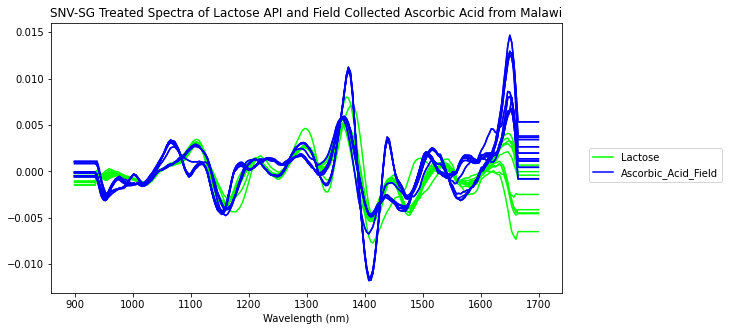

In [138]:
#Ascorbic Acid Field (Malawi) vs. Lactose Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Lactose_SNVSG, label='Lactose',color='#00FF00');
ax.plot(wv_malawi, Ascorbic_Acid_malawi_snvsg, label='Ascorbic_Acid_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Lactose API and Field Collected Ascorbic Acid from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

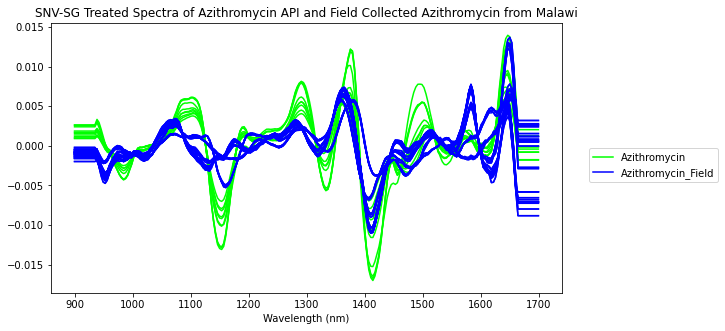

In [139]:
#Azithromycin Field (Malawi) vs. Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Azithromycin_SNVSG, label='Azithromycin',color='#00FF00');
ax.plot(wv_malawi, Azithromycin_malawi_snvsg, label='Azithromycin_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Azithromycin API and Field Collected Azithromycin from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

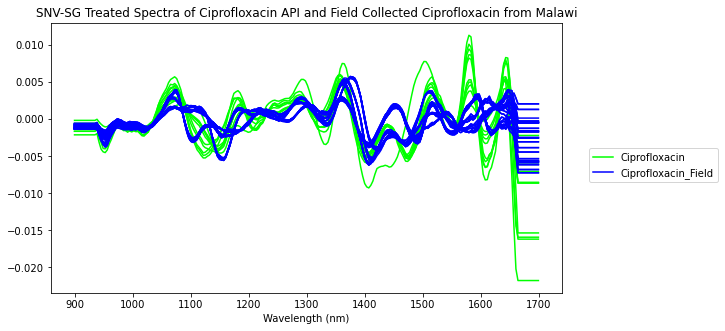

In [140]:
#Ciprofloxacin Field (Malawi) vs. Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Ciprofloxacin_SNVSG, label='Ciprofloxacin',color='#00FF00');
ax.plot(wv_malawi, Ciprofloxacin_malawi_snvsg, label='Ciprofloxacin_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Ciprofloxacin API and Field Collected Ciprofloxacin from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

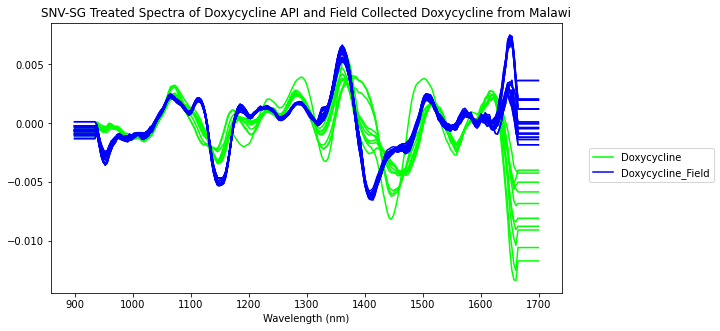

In [141]:
#Doxycycline Field (Malawi) vs. Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Doxycycline_SNVSG, label='Doxycycline',color='#00FF00');
ax.plot(wv_malawi, Doxycycline_malawi_snvsg, label='Doxycycline_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Doxycycline API and Field Collected Doxycycline from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

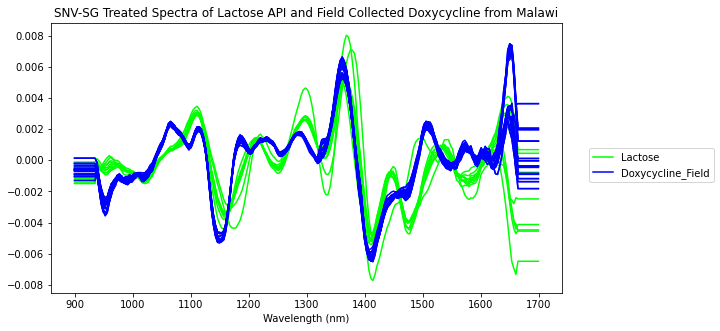

In [142]:
#Doxycycline Field (Malawi) vs. Lactose Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Lactose_SNVSG, label='Lactose',color='#00FF00');
ax.plot(wv_malawi, Doxycycline_malawi_snvsg, label='Doxycycline_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Lactose API and Field Collected Doxycycline from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

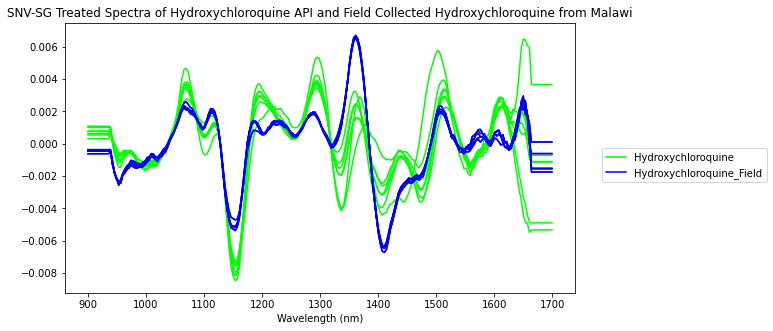

In [143]:
#Hydroxychloroquine  Field (Malawi) vs. Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Hydroxychloroquine_SNVSG, label='Hydroxychloroquine',color='#00FF00');
ax.plot(wv_malawi, Hydroxychloroquine_malawi_snvsg, label='Hydroxychloroquine_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Hydroxychloroquine API and Field Collected Hydroxychloroquine from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()

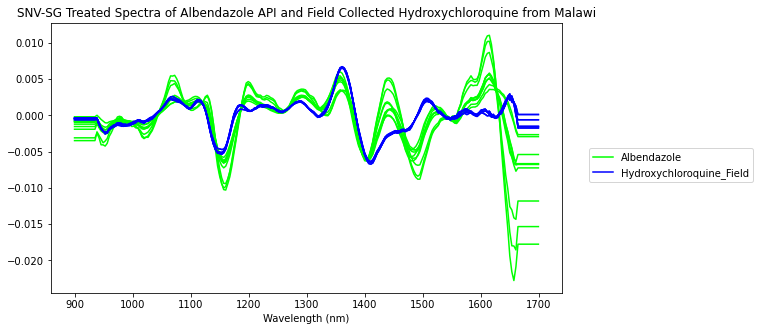

In [144]:
#Hydroxychloroquine  Field (Malawi) vs. Albendazole Database
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, Albendazole_SNVSG, label='Albendazole',color='#00FF00');
ax.plot(wv_malawi, Hydroxychloroquine_malawi_snvsg, label='Hydroxychloroquine_Field',color='#0000FF');
plt.xlabel('Wavelength (nm)')
#plt.ylabel('Absorbance')
plt.title("SNV-SG Treated Spectra of Albendazole API and Field Collected Hydroxychloroquine from Malawi")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h, l in zip(hand, labl):
    if l not in lablout:
        lablout.append(l)
        handout.append(h)

# Position the legend to the right of the plot
fig.legend(handout, lablout, bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.tight_layout() 

plt.show()